In [151]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/utils")

import format_time as ft
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

EPOCHS = 100
BATCH_SIZE = 128
SAMPLES = 50000

RESULTS_PATH = '../results_all/'
SERVER1_PATH = RESULTS_PATH + 'server_a2000/results_100epochs_128batch/'
SERVER2_PATH = RESULTS_PATH + 'server_3080/results_100epochs_128batch/'

df_nostats_train = pd.read_csv(SERVER1_PATH + r'mlresults_nostats_train.csv')
df_nostats_train['duration(s)'] = df_nostats_train['duration(s)'].apply(lambda x: ft.plot_time(x))
df_nostats_train['step(ms)'] = df_nostats_train['step(ms)'].apply(lambda x: ft.plot_time(x))

df_stats_train = pd.read_csv(SERVER1_PATH + r'mlresults_stats_train.csv')
df_stats_train['duration(s)'] = df_stats_train['duration(s)'].apply(lambda x: ft.plot_time(x))
df_stats_train['step(ms)'] = df_stats_train['step(ms)'].apply(lambda x: ft.plot_time(x))

df_eco2ai_train = pd.read_csv(SERVER1_PATH + r'mlresults_eco2ai_nostats_train.csv')
df_eco2ai_train['duration(s)'] = df_eco2ai_train['duration(s)'].apply(lambda x: ft.plot_time(x))
df_eco2ai_train['step(ms)'] = df_eco2ai_train['step(ms)'].apply(lambda x: ft.plot_time(x))

df_codecarbon_train = pd.read_csv(SERVER1_PATH + r'mlresults_codecarbon_nostats_train.csv')
df_codecarbon_train['duration(s)'] = df_codecarbon_train['duration(s)'].apply(lambda x: ft.plot_time(x))
df_codecarbon_train['step(ms)'] = df_codecarbon_train['step(ms)'].apply(lambda x: ft.plot_time(x))

df_carbontracker_train = pd.read_csv(SERVER1_PATH + r'mlresults_carbontracker_nostats_train.csv')
df_carbontracker_train['duration(s)'] = df_carbontracker_train['duration(s)'].apply(lambda x: ft.plot_time(x))
df_carbontracker_train['step(ms)'] = df_carbontracker_train['step(ms)'].apply(lambda x: ft.plot_time(x))

df_nostats_test = pd.read_csv(SERVER1_PATH + r'mlresults_nostats_test.csv')
df_nostats_test['duration(s)'] = df_nostats_test['duration(s)'].apply(lambda x: ft.plot_time(x))
df_nostats_test['step(ms)'] = df_nostats_test['step(ms)'].apply(lambda x: ft.plot_time(x))

df_stats_test = pd.read_csv(SERVER1_PATH + r'mlresults_stats_test.csv')
df_stats_test['duration(s)'] = df_stats_test['duration(s)'].apply(lambda x: ft.plot_time(x))
df_stats_test['step(ms)'] = df_stats_test['step(ms)'].apply(lambda x: ft.plot_time(x))

df_eco2ai_test = pd.read_csv(SERVER1_PATH + r'mlresults_eco2ai_nostats_test.csv')
df_eco2ai_test['duration(s)'] = df_eco2ai_test['duration(s)'].apply(lambda x: ft.plot_time(x))
df_eco2ai_test['step(ms)'] = df_eco2ai_test['step(ms)'].apply(lambda x: ft.plot_time(x))

df_codecarbon_test = pd.read_csv(SERVER1_PATH + r'mlresults_codecarbon_nostats_test.csv')
df_codecarbon_test['duration(s)'] = df_codecarbon_test['duration(s)'].apply(lambda x: ft.plot_time(x))
df_codecarbon_test['step(ms)'] = df_codecarbon_test['step(ms)'].apply(lambda x: ft.plot_time(x))

df_carbontracker_test = pd.read_csv(SERVER1_PATH + r'mlresults_carbontracker_nostats_test.csv')
df_carbontracker_test['duration(s)'] = df_carbontracker_test['duration(s)'].apply(lambda x: ft.plot_time(x))
df_carbontracker_test['step(ms)'] = df_carbontracker_test['step(ms)'].apply(lambda x: ft.plot_time(x))

df_codecarbon = pd.read_csv(SERVER1_PATH + r'emissions.csv')
df_codecarbon_results_train = pd.DataFrame(df_codecarbon.values[::2],index=df_codecarbon.index[::2],columns=df_codecarbon.columns).reset_index(drop=True)
df_codecarbon_results_test = pd.DataFrame(df_codecarbon.values[1::2],index=df_codecarbon.index[1::2],columns=df_codecarbon.columns).reset_index(drop=True)

df_eco2ai = pd.read_csv(SERVER1_PATH + r'resultsEco2AI.csv')
df_eco2ai_results_train = pd.DataFrame(df_eco2ai.values[::2],index=df_eco2ai.index[::2],columns=df_eco2ai.columns).reset_index(drop=True)
df_eco2ai_results_test = pd.DataFrame(df_eco2ai.values[1::2],index=df_eco2ai.index[1::2],columns=df_eco2ai.columns).reset_index(drop=True)

with open(SERVER1_PATH + 'stats_train.json') as f:
    stats_train = json.load(f)
stats_train = stats_train['exp_0']

with open(SERVER1_PATH + 'stats_test.json') as f:
    stats_test = json.load(f)
stats_test = stats_test['exp_0']

with open(SERVER1_PATH + 'model_size.json') as f:
    model_size = json.load(f)

def add_label(x, y, val, ax, distance=0, other=None):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if other is None:
            ax.text(point['x']+distance, point['y'], str(point['val']))
        else:
            ax.text(point['x']+distance, point['y'], str(point['val']) + str(other))

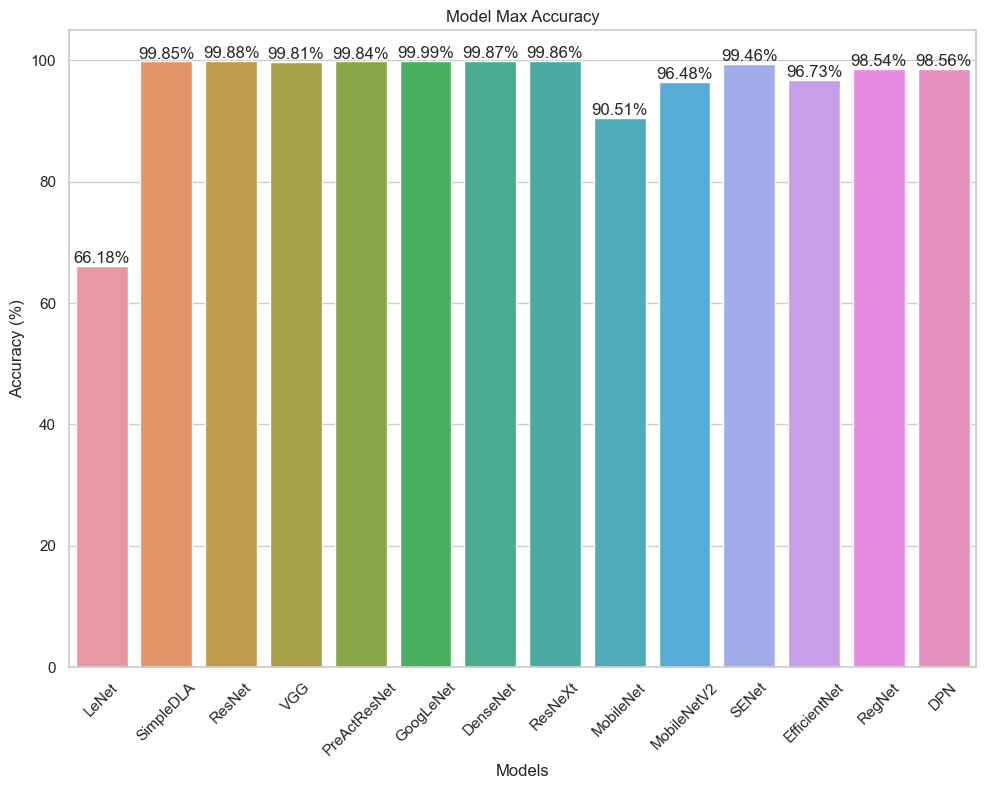

In [152]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="project_name", y="accuracy", data=df_stats_train, estimator= np.max, errorbar=None)
plt.xticks(rotation=45)
plt.title('Model Max Accuracy')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

# Adding text labels above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}%'.format(p.get_height()), # You can format it as you like
            ha='center', va='bottom')


plt.show()

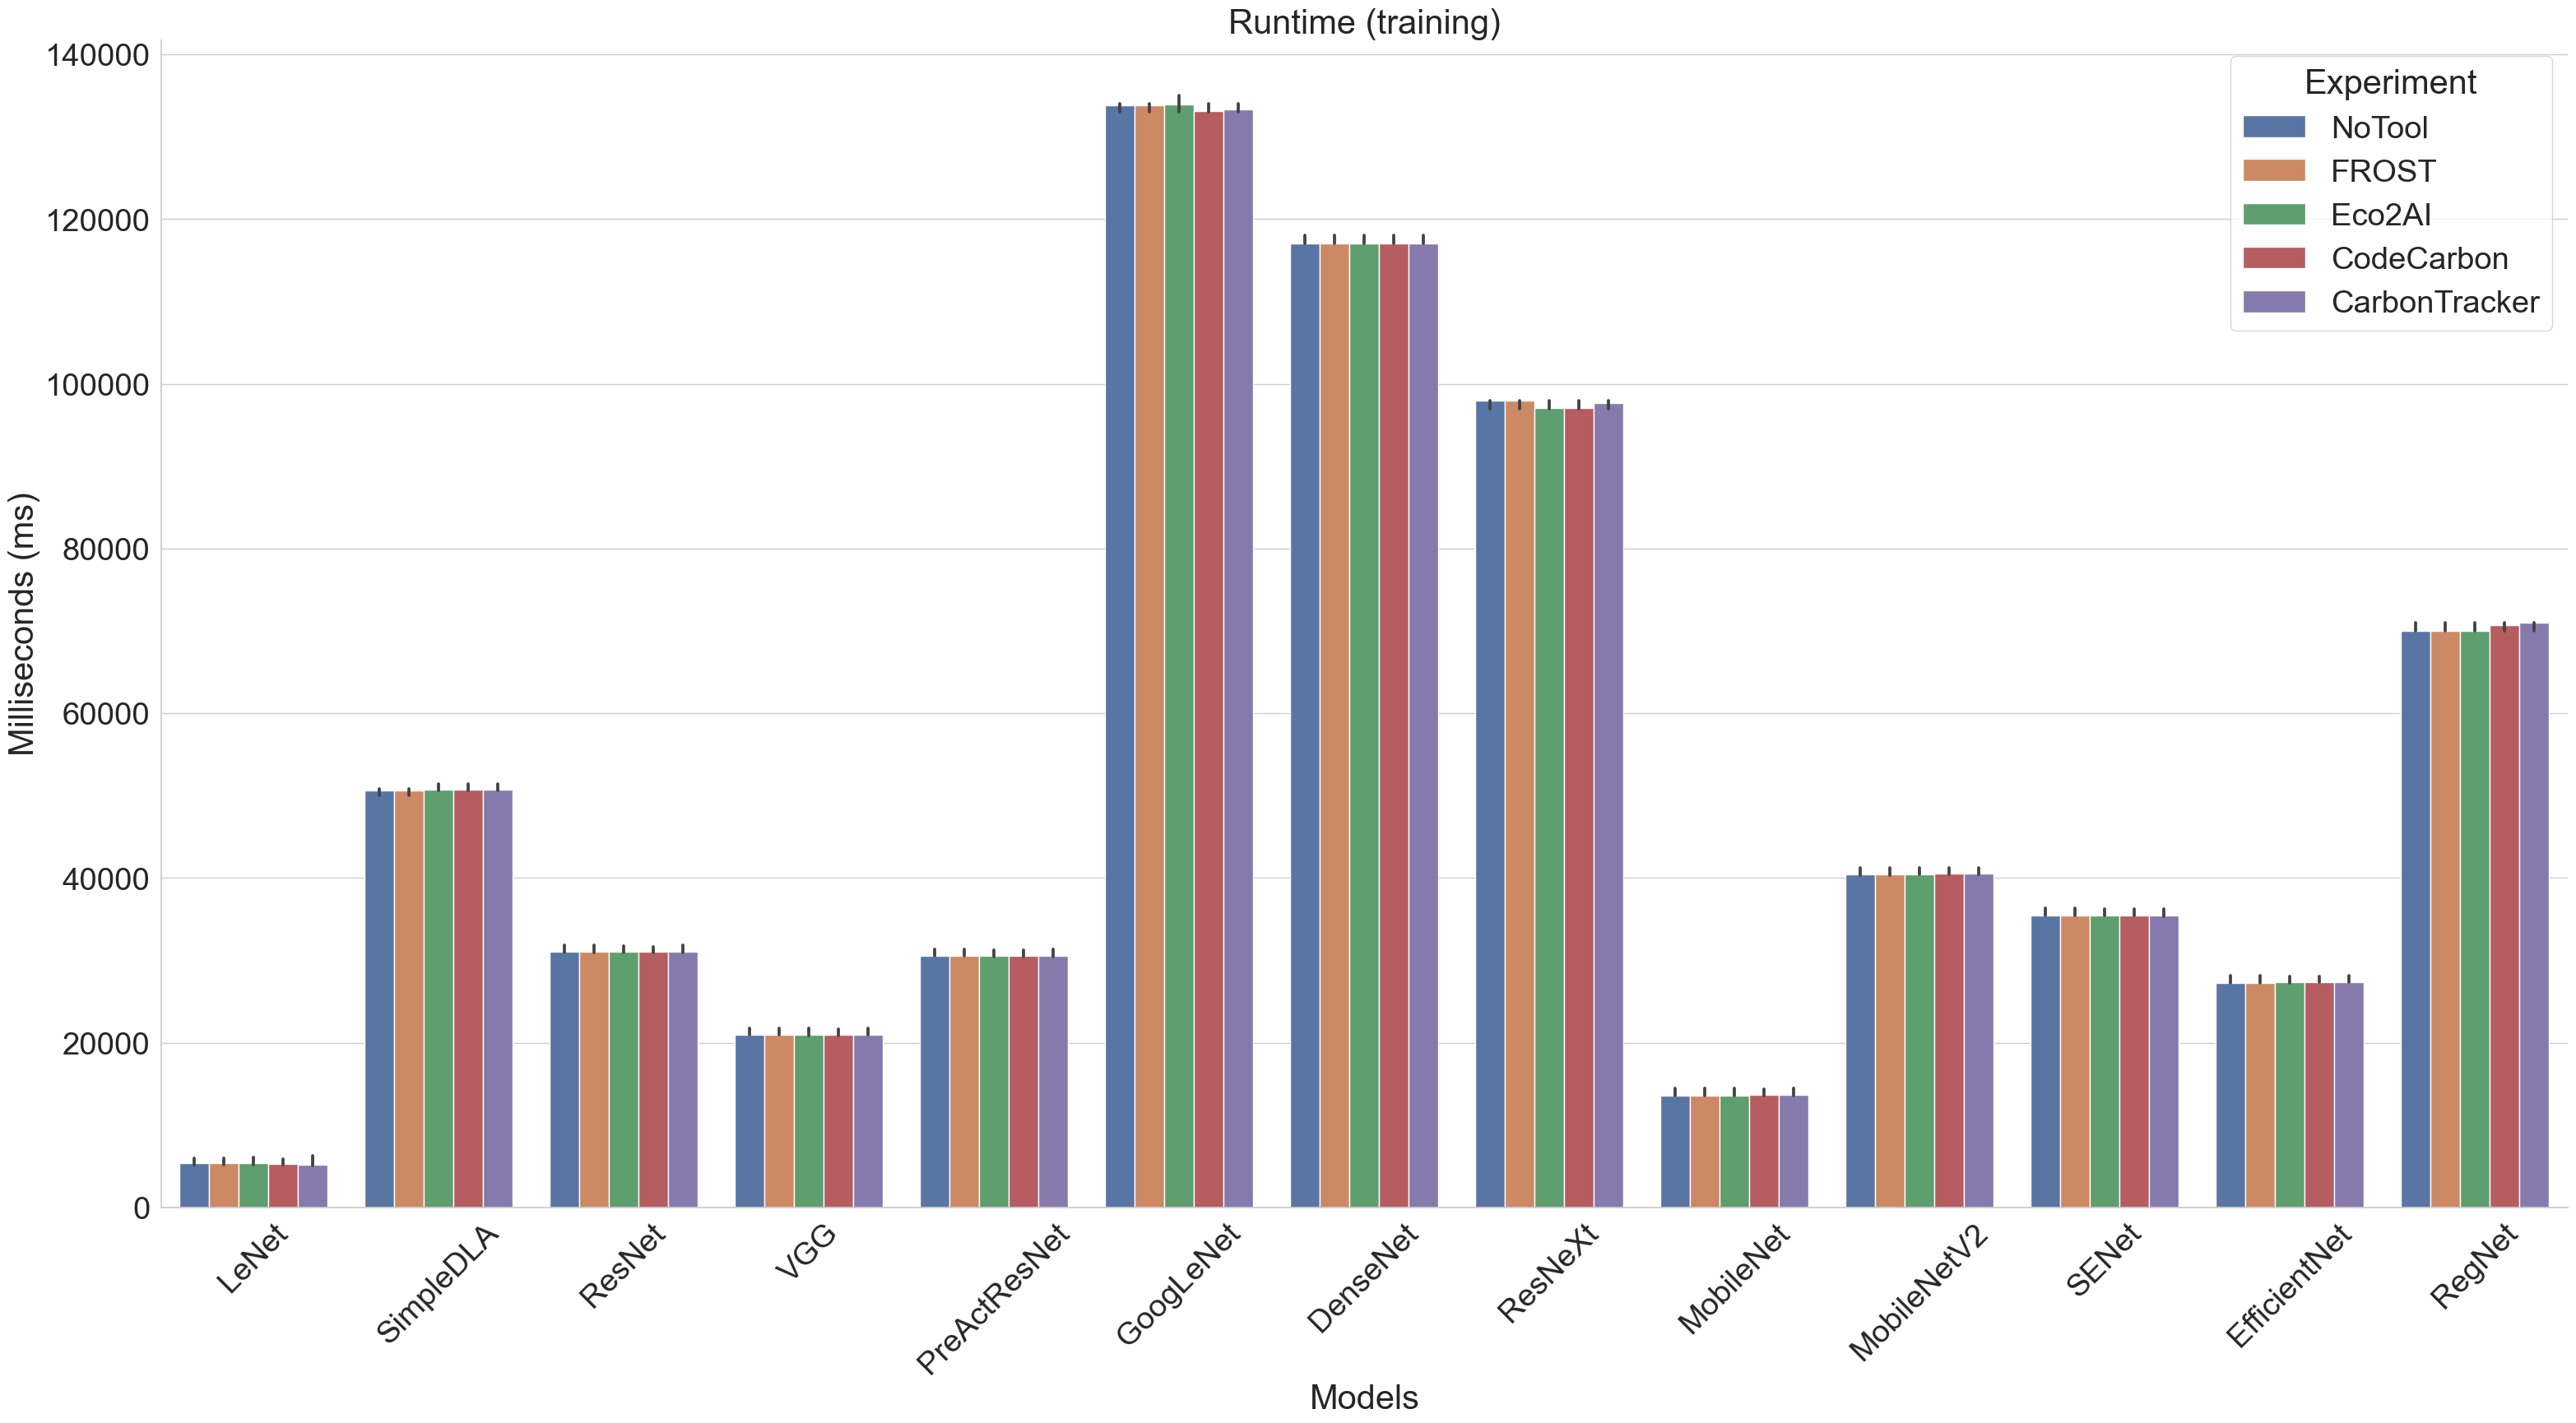

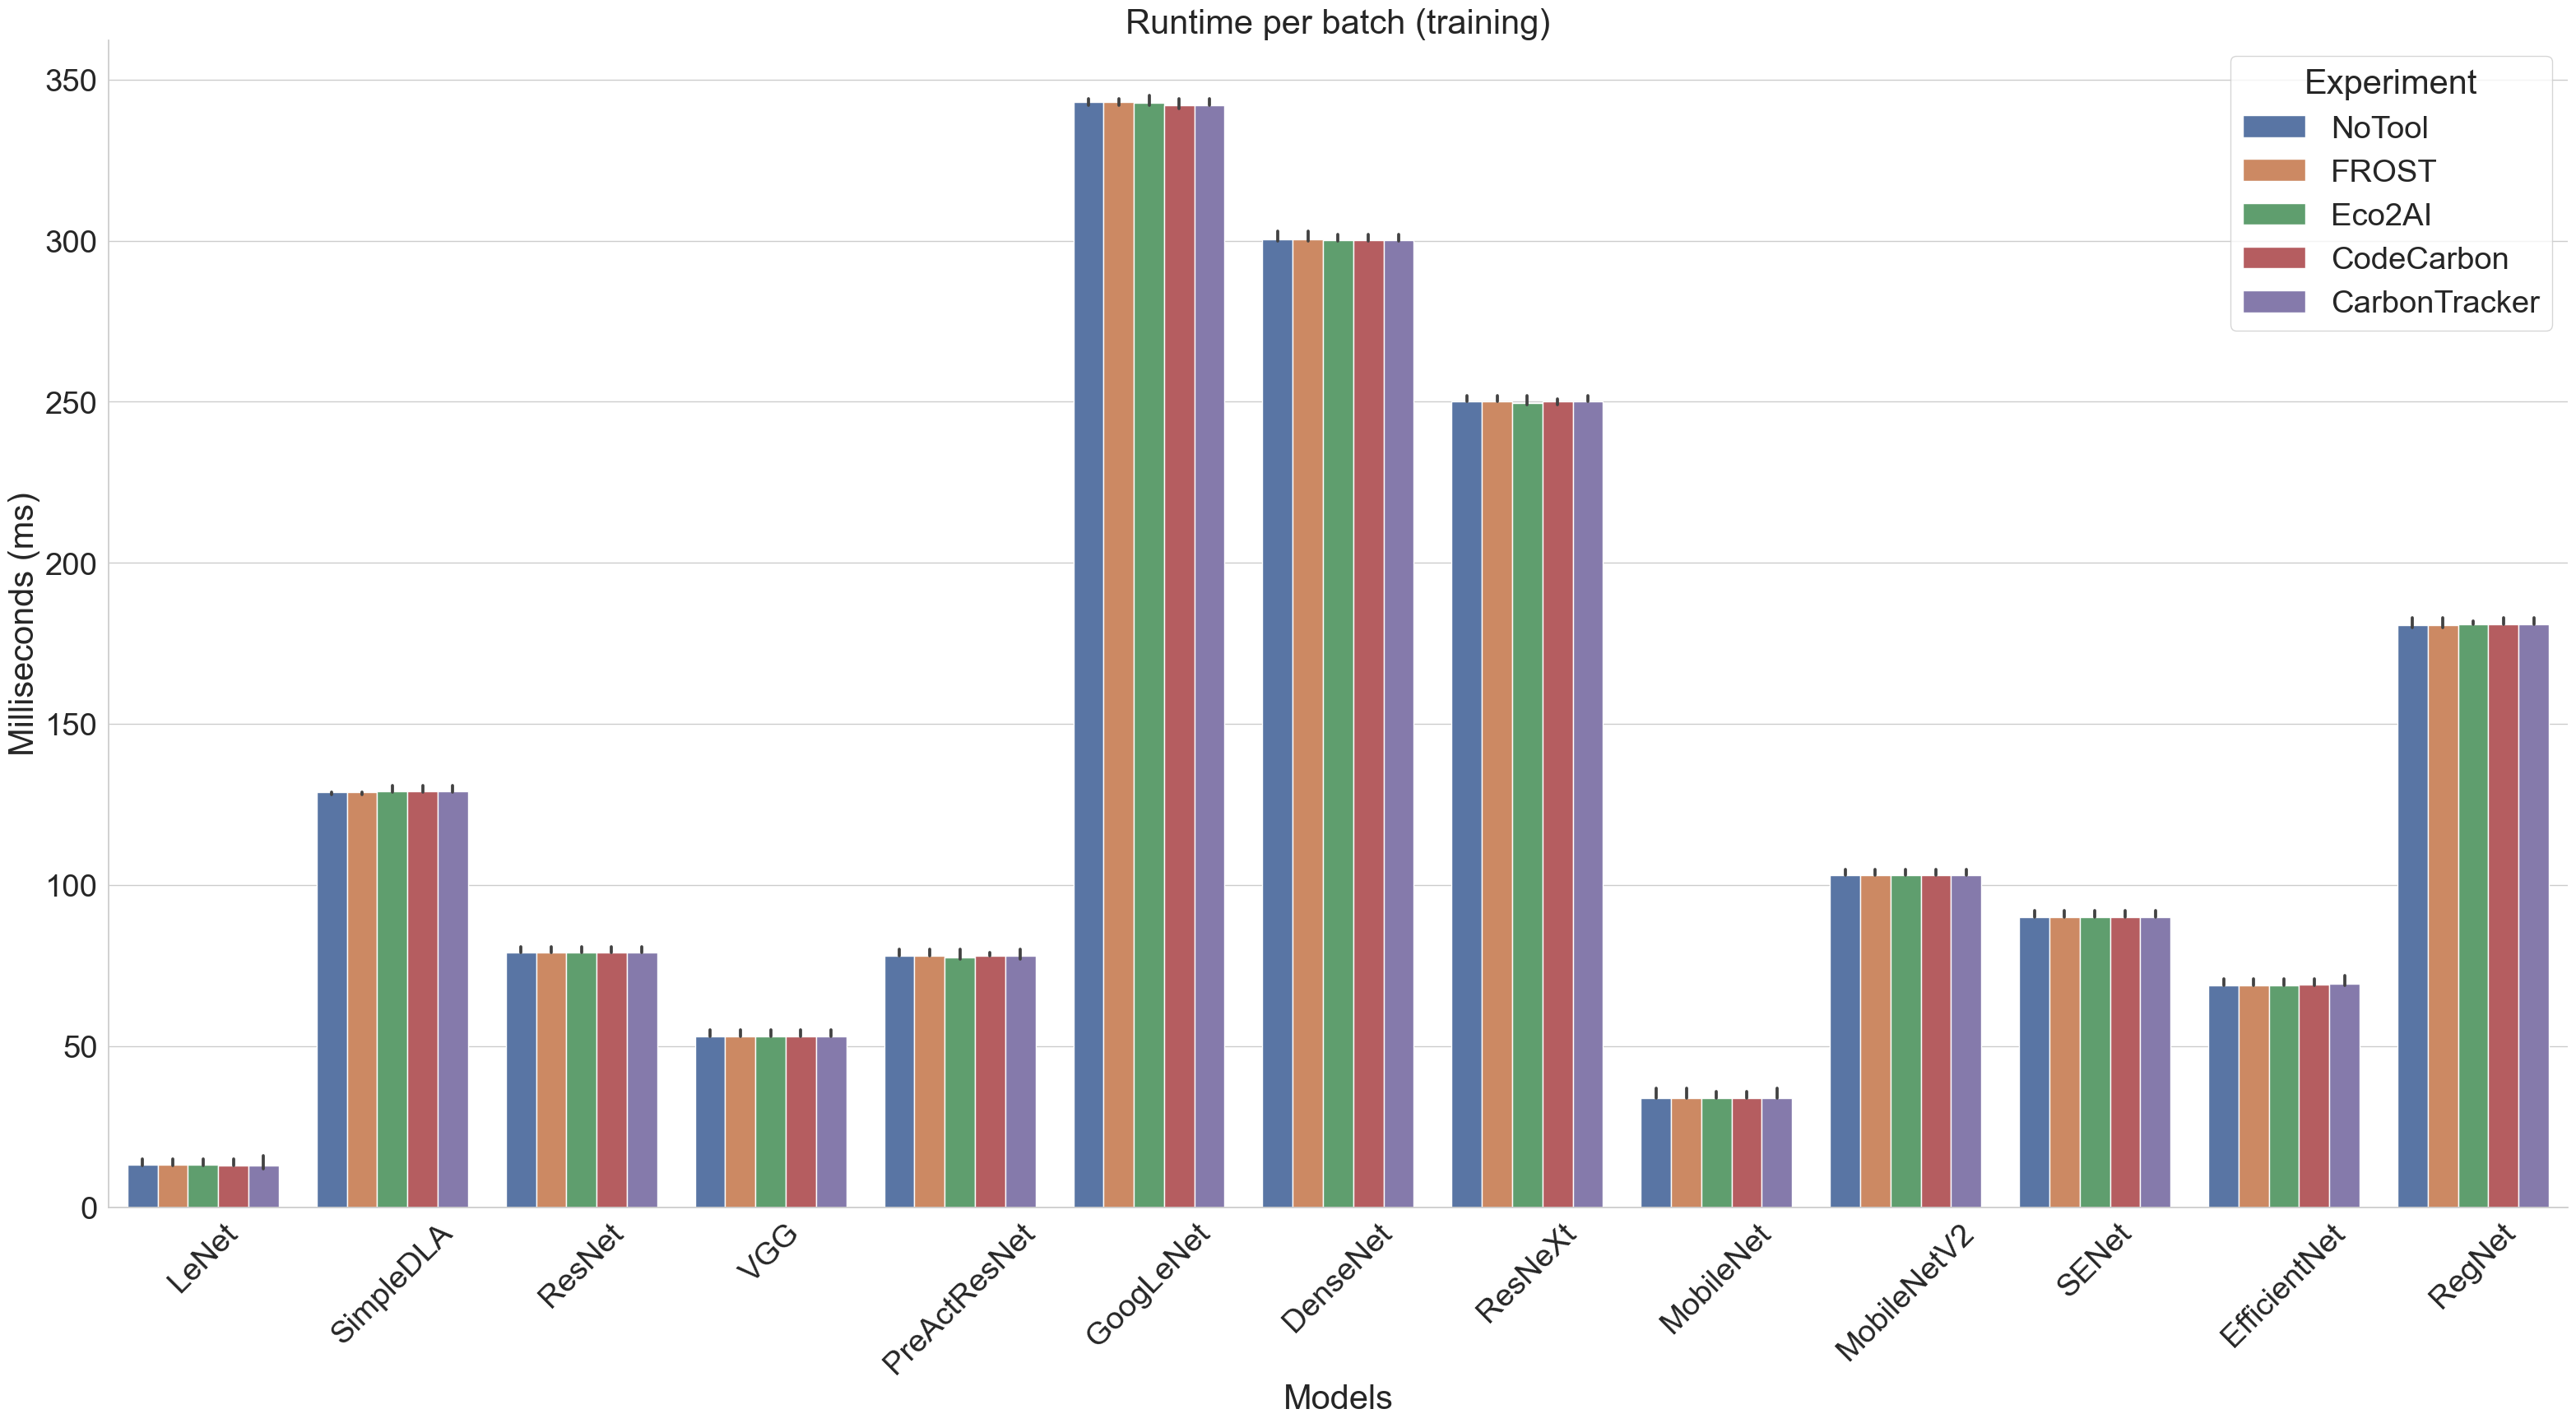

In [153]:
merged_duration_df = pd.merge(df_nostats_train, df_stats_train, on=['project_name', 'epoch'], suffixes=('_nostats', '_frost'))
merged_duration_df.rename(columns={"duration(s)_nostats": "NoTool"}, inplace=True)
merged_duration_df.rename(columns={"duration(s)_frost": "FROST"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_eco2ai_train, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"duration(s)": "Eco2AI"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_codecarbon_train, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"duration(s)": "CodeCarbon"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_carbontracker_train, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"duration(s)": "CarbonTracker"}, inplace=True)
merged_duration_df = merged_duration_df[['project_name', 'NoTool', 'FROST', 'Eco2AI', 'CodeCarbon', 'CarbonTracker']]

sns.set_theme(style="whitegrid", font_scale=2.5)

sns.catplot(x="project_name", y="value", hue="variable", kind="bar", errorbar=lambda x: (x.min(), x.max()), data=pd.melt(merged_duration_df, id_vars=['project_name']), height=16, aspect=2/1, legend_out=False)
plt.xticks(rotation=45)
plt.title('Runtime (training)')
plt.xlabel("Models")
plt.ylabel("Milliseconds (ms)")
plt.legend(loc='upper right', title='Experiment')
plt.show()

merged_duration_df = pd.merge(df_nostats_train, df_stats_train, on=['project_name', 'epoch'], suffixes=('_nostats', '_frost'))
merged_duration_df.rename(columns={"step(ms)_nostats": "NoTool"}, inplace=True)
merged_duration_df.rename(columns={"step(ms)_frost": "FROST"}, inplace=True)

merged_duration_df = pd.merge(merged_duration_df, df_eco2ai_train, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"step(ms)": "Eco2AI"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_codecarbon_train, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"step(ms)": "CodeCarbon"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_carbontracker_train, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"step(ms)": "CarbonTracker"}, inplace=True)
merged_duration_df = merged_duration_df[['project_name', 'NoTool', 'FROST', 'Eco2AI', 'CodeCarbon', 'CarbonTracker']]

sns.set_theme(style="whitegrid", font_scale=2.5)

sns.catplot(x="project_name", y="value", hue="variable", kind="bar", errorbar=lambda x: (x.min(), x.max()), data=pd.melt(merged_duration_df, id_vars=['project_name']), height=16, aspect=2/1, legend_out=False)
plt.xticks(rotation=45)
plt.title('Runtime per batch (training)')
plt.xlabel("Models")
plt.ylabel("Milliseconds (ms)")
plt.legend(loc='upper right', title='Experiment')
plt.show()

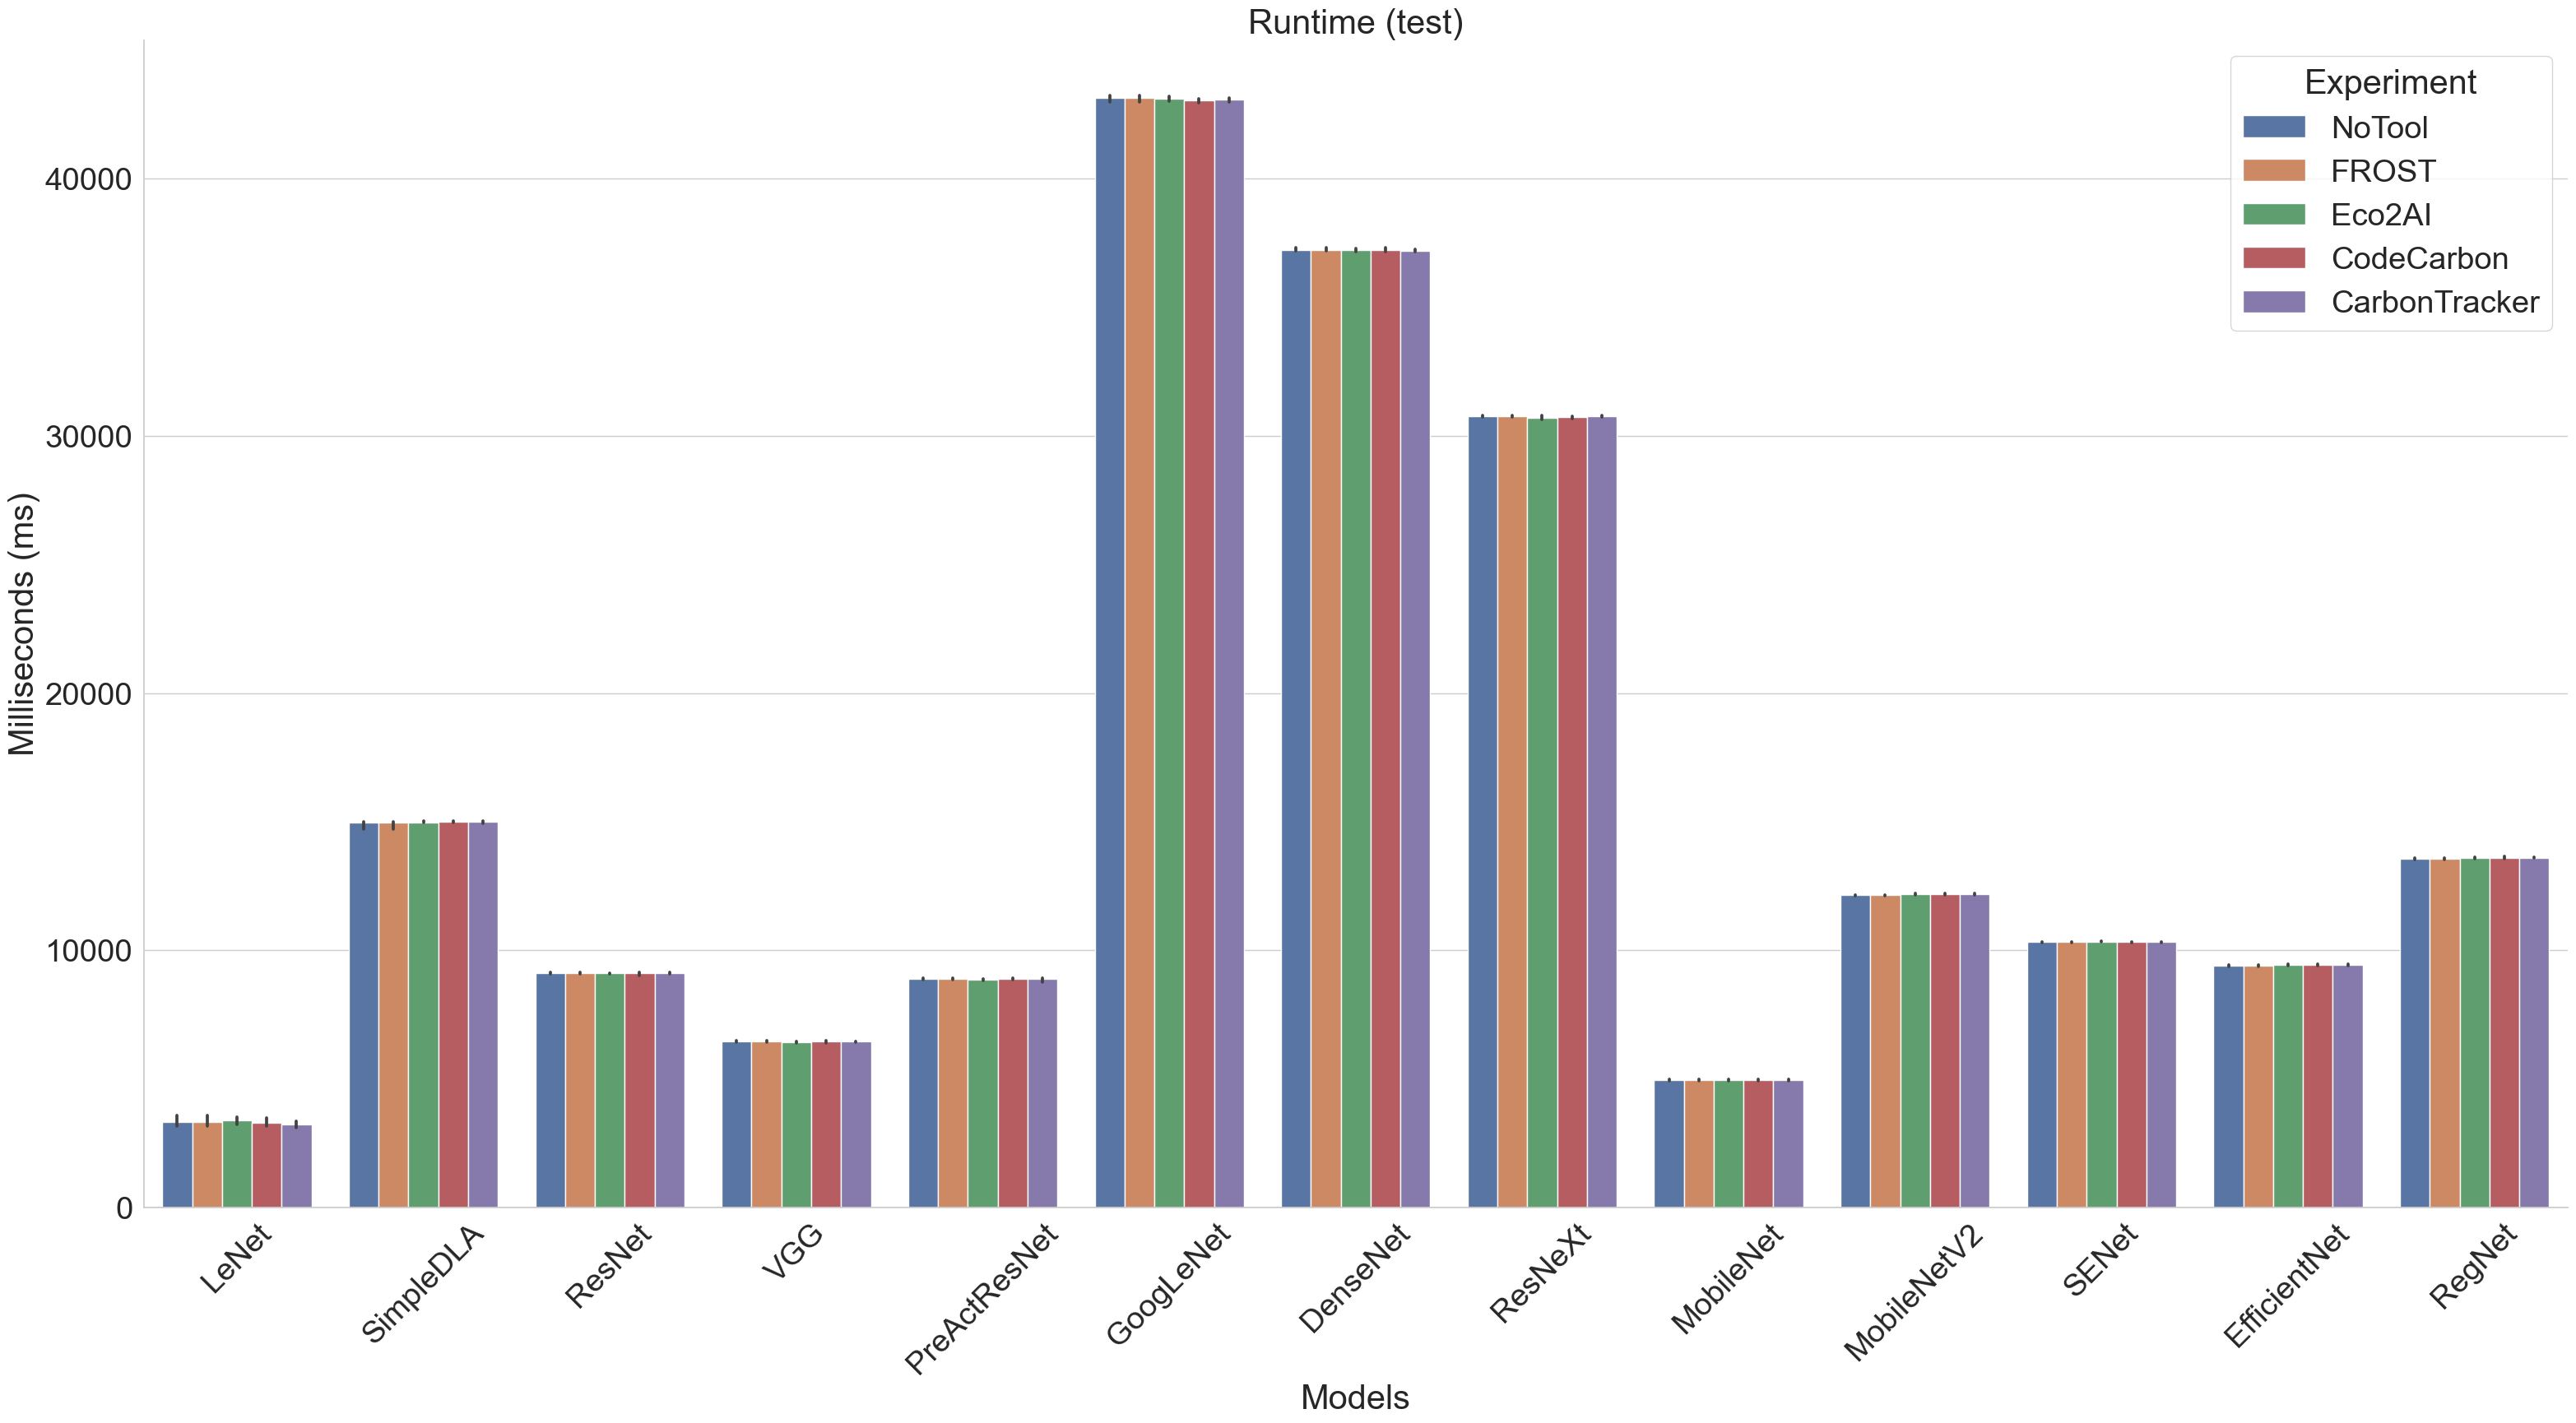

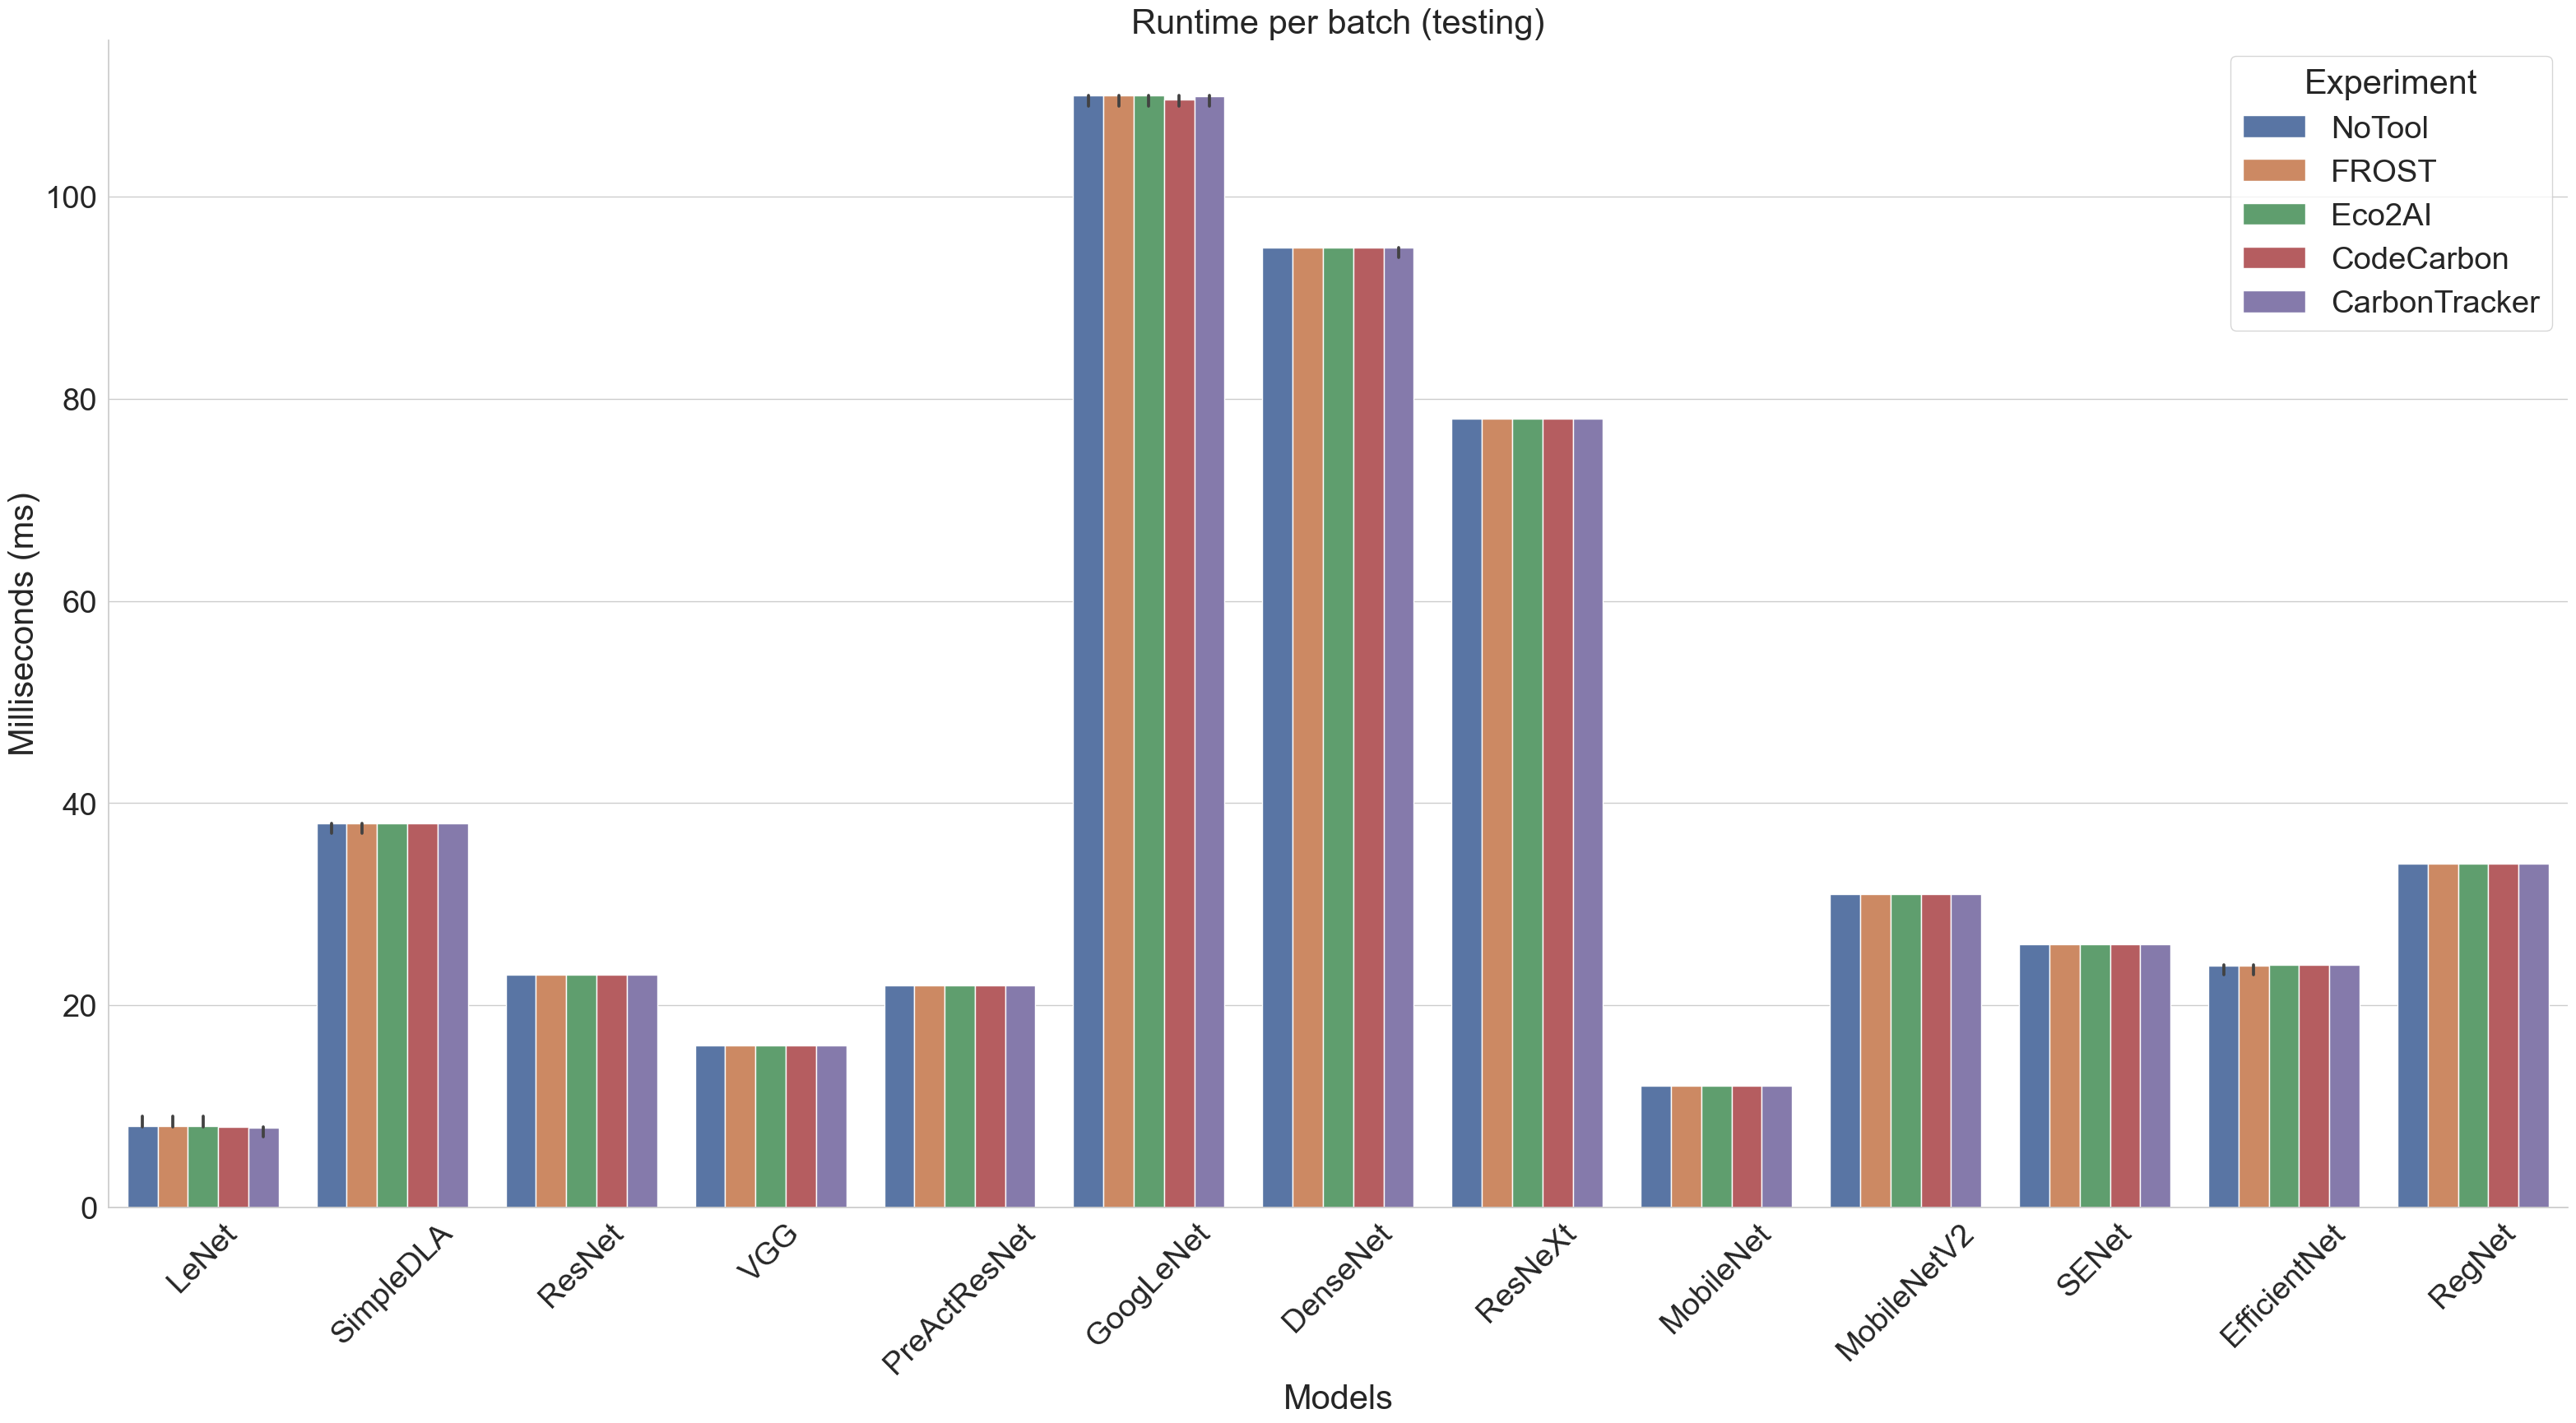

In [154]:
merged_duration_df = pd.merge(df_nostats_test, df_stats_test, on=['project_name', 'epoch'], suffixes=('_nostats', '_frost'))
merged_duration_df.rename(columns={"duration(s)_nostats": "NoTool"}, inplace=True)
merged_duration_df.rename(columns={"duration(s)_frost": "FROST"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_eco2ai_test, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"duration(s)": "Eco2AI"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_codecarbon_test, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"duration(s)": "CodeCarbon"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_carbontracker_test, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"duration(s)": "CarbonTracker"}, inplace=True)
merged_duration_df = merged_duration_df[['project_name', 'NoTool', 'FROST', 'Eco2AI', 'CodeCarbon', 'CarbonTracker']]

sns.set_theme(style="whitegrid", font_scale=2.5)

sns.catplot(x="project_name", y="value", hue="variable", kind="bar", errorbar=lambda x: (x.min(), x.max()), data=pd.melt(merged_duration_df, id_vars=['project_name']), height=16, aspect=2/1, legend_out=False)
plt.xticks(rotation=45)
plt.title('Runtime (test)')
plt.xlabel("Models")
plt.ylabel("Milliseconds (ms)")
plt.legend(loc='upper right', title='Experiment')
plt.show()

merged_duration_df = pd.merge(df_nostats_test, df_stats_test, on=['project_name', 'epoch'], suffixes=('_nostats', '_frost'))
merged_duration_df.rename(columns={"step(ms)_nostats": "NoTool"}, inplace=True)
merged_duration_df.rename(columns={"step(ms)_frost": "FROST"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_eco2ai_test, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"step(ms)": "Eco2AI"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_codecarbon_test, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"step(ms)": "CodeCarbon"}, inplace=True)
merged_duration_df = pd.merge(merged_duration_df, df_carbontracker_test, on=['project_name', 'epoch'])
merged_duration_df.rename(columns={"step(ms)": "CarbonTracker"}, inplace=True)
merged_duration_df = merged_duration_df[['project_name', 'NoTool', 'FROST', 'Eco2AI', 'CodeCarbon', 'CarbonTracker']]

sns.set_theme(style="whitegrid", font_scale=2.5)

sns.catplot(x="project_name", y="value", hue="variable", kind="bar", errorbar=lambda x: (x.min(), x.max()), data=pd.melt(merged_duration_df, id_vars=['project_name']), height=16, aspect=2/1, legend_out=False)
plt.xticks(rotation=45)
plt.title('Runtime per batch (testing)')
plt.xlabel("Models")
plt.ylabel("Milliseconds (ms)")
plt.legend(loc='upper right', title='Experiment')
plt.show()

In [155]:
stats_train_tmp = stats_train.copy()

models = df_stats_train.project_name.unique()

for model in models:
    tmp_dict = stats_train_tmp[model]
    model_size_tmp = model_size[model]
    for epoch in tmp_dict.keys():
        filtered = filter(lambda num: num >= 0, tmp_dict[epoch]['cpu_delta_power_w'])
        tmp_dict[epoch]['cpu_delta_power_w'] = list(filtered)

        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'start_time'] = tmp_dict[epoch]['start_time']
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'stop_time'] = tmp_dict[epoch]['stop_time']
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'cpu_energy_uj'] = np.mean(tmp_dict[epoch]['cpu_energy_uj'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'cpu_delta_power_w'] = np.mean(tmp_dict[epoch]['cpu_delta_power_w'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'cpu_percent'] = np.mean(tmp_dict[epoch]['cpu_percent'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'cpu_memory_percent'] = np.mean(tmp_dict[epoch]['cpu_memory_percent'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'cpu_temperature_c'] = np.mean(tmp_dict[epoch]['cpu_temperature_c'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'gpu_power_w'] = np.mean(tmp_dict[epoch]['gpu_power_w'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'gpu_temperature_c'] = np.mean(tmp_dict[epoch]['gpu_temperature_c'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'gpu_memory_free_b'] = np.mean(tmp_dict[epoch]['gpu_memory_free_b'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'gpu_memory_used_b'] = np.mean(tmp_dict[epoch]['gpu_memory_used_b'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'gpu_percent'] = np.mean(tmp_dict[epoch]['gpu_percent'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'ram_power_w'] = np.mean(tmp_dict[epoch]['ram_power_w'])
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'size_mb'] = model_size_tmp['size_mb']
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'parameters'] = model_size_tmp['parameters']
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'buffer'] = model_size_tmp['buffer']
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'macs'] = model_size_tmp['macs']
        df_stats_train.loc[(df_stats_train['project_name'] == model) & (df_stats_train['epoch'] == int(epoch)), 'trainable_params'] = model_size_tmp['trainable_params']

stats_test_tmp = stats_test.copy()

models = df_stats_test.project_name.unique()

for model in models:
    tmp_dict = stats_test_tmp[model]
    model_size_tmp = model_size[model]
    for epoch in tmp_dict.keys():
        filtered = filter(lambda num: num >= 0, tmp_dict[epoch]['cpu_delta_power_w'])
        tmp_dict[epoch]['cpu_delta_power_w'] = list(filtered)
        
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'start_time'] = tmp_dict[epoch]['start_time']
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'stop_time'] = tmp_dict[epoch]['stop_time']
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'cpu_energy_uj'] = np.mean(tmp_dict[epoch]['cpu_energy_uj'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'cpu_delta_power_w'] = np.mean(tmp_dict[epoch]['cpu_delta_power_w'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'cpu_percent'] = np.mean(tmp_dict[epoch]['cpu_percent'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'cpu_memory_percent'] = np.mean(tmp_dict[epoch]['cpu_memory_percent'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'cpu_temperature_c'] = np.mean(tmp_dict[epoch]['cpu_temperature_c'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'gpu_power_w'] = np.mean(tmp_dict[epoch]['gpu_power_w'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'gpu_temperature_c'] = np.mean(tmp_dict[epoch]['gpu_temperature_c'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'gpu_memory_free_b'] = np.mean(tmp_dict[epoch]['gpu_memory_free_b'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'gpu_memory_used_b'] = np.mean(tmp_dict[epoch]['gpu_memory_used_b'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'gpu_percent'] = np.mean(tmp_dict[epoch]['gpu_percent'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'ram_power_w'] = np.mean(tmp_dict[epoch]['ram_power_w'])
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'size_mb'] = model_size_tmp['size_mb']
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'parameters'] = model_size_tmp['parameters']
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'buffer'] = model_size_tmp['buffer']
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'macs'] = model_size_tmp['macs']
        df_stats_test.loc[(df_stats_test['project_name'] == model) & (df_stats_test['epoch'] == int(epoch)), 'trainable_params'] = model_size_tmp['trainable_params']        

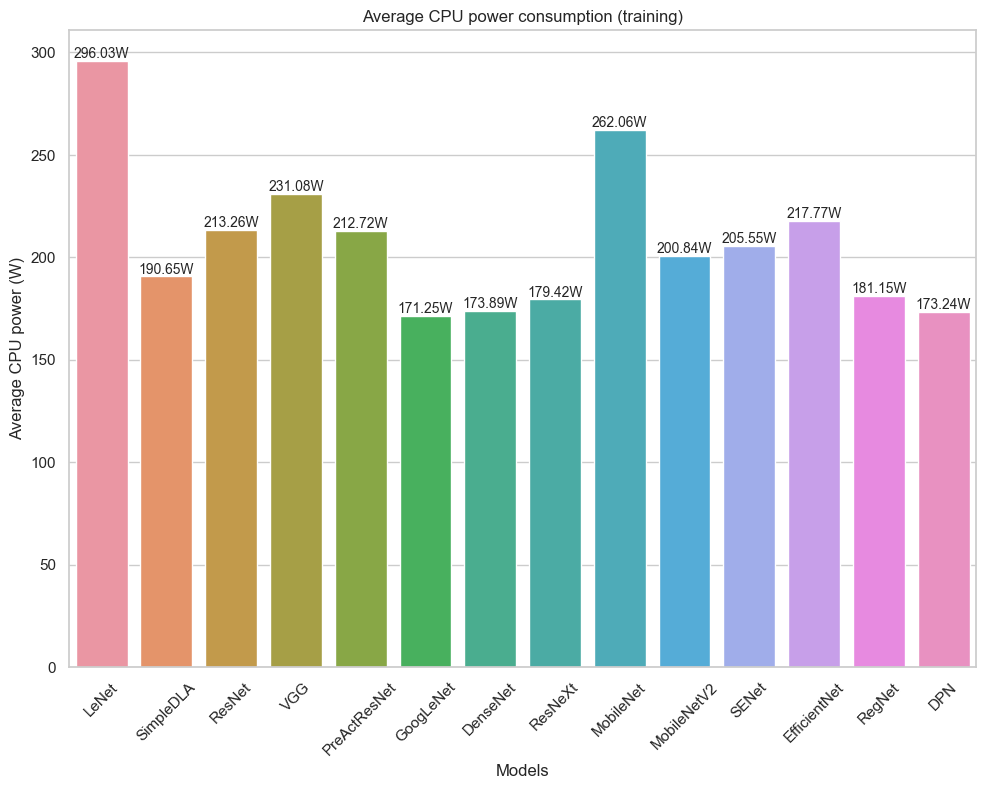

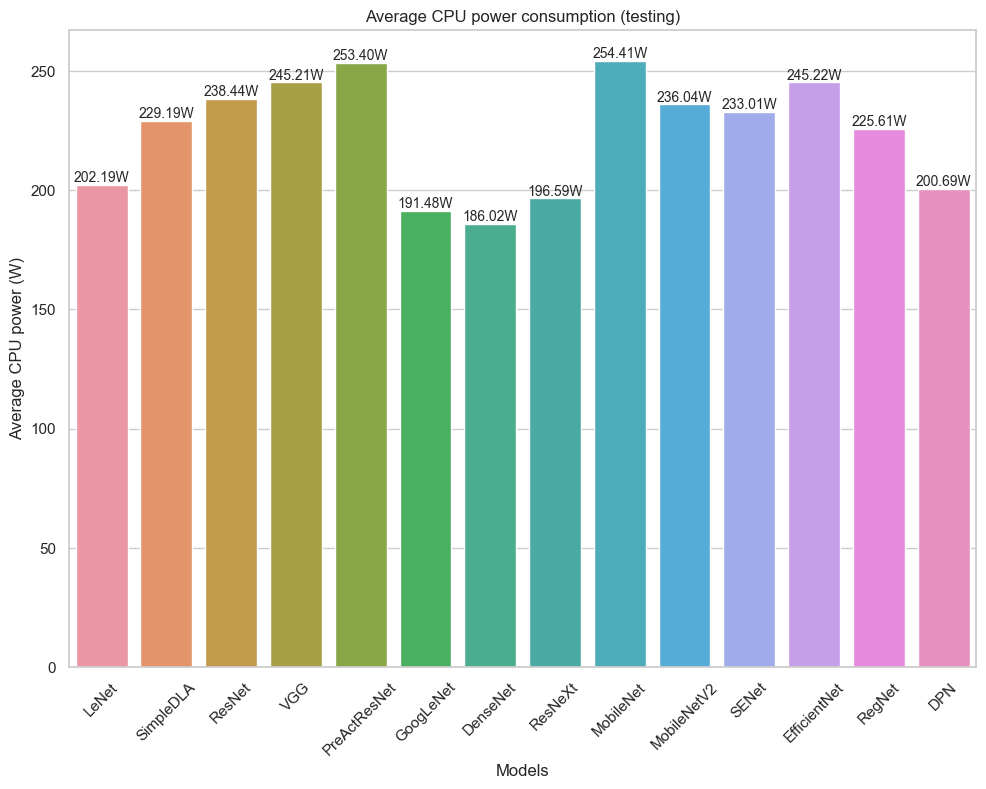

In [156]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="project_name", y="cpu_delta_power_w", data=df_stats_train, estimator= np.max, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average CPU power consumption (training)')
plt.xlabel("Models")
plt.ylabel("Average CPU power (W)")

# Adding text labels above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}W'.format(p.get_height()), # You can format it as you like
            ha='center', va='bottom', fontsize=10)

plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="project_name", y="cpu_delta_power_w", data=df_stats_test, estimator= np.max, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average CPU power consumption (testing)')
plt.xlabel("Models")
plt.ylabel("Average CPU power (W)")

# Adding text labels above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}W'.format(p.get_height()), # You can format it as you like
            ha='center', va='bottom', fontsize=10)

plt.show()

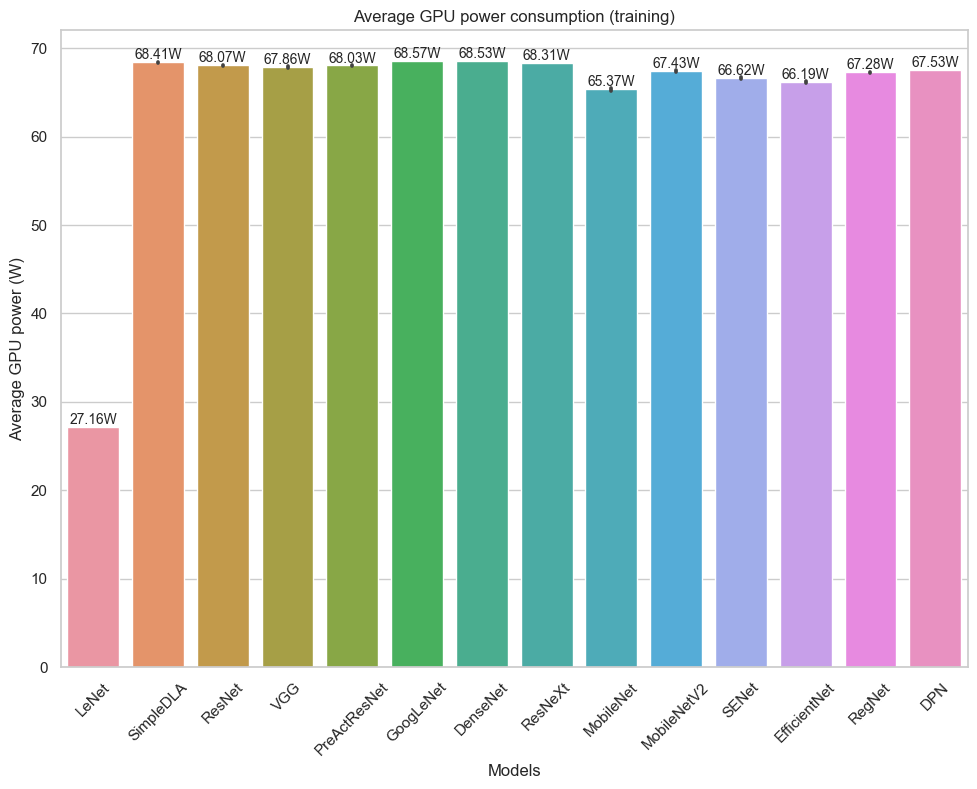

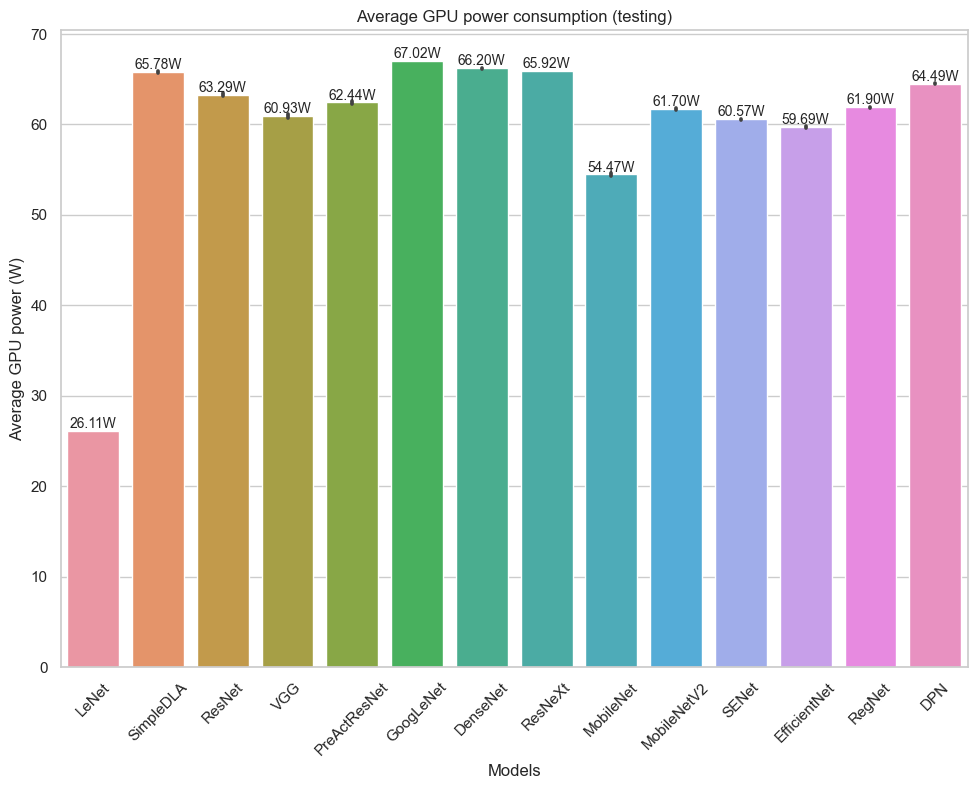

In [157]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="project_name", y="gpu_power_w", data=df_stats_train, estimator=lambda x: np.mean(x)/1000)
plt.xticks(rotation=45)
plt.title('Average GPU power consumption (training)')
plt.xlabel("Models")
plt.ylabel("Average GPU power (W)")

# Adding text labels above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}W'.format(p.get_height()), # You can format it as you like
            ha='center', va='bottom', fontsize=10)

plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="project_name", y="gpu_power_w", data=df_stats_test, estimator=lambda x: np.mean(x)/1000)
plt.xticks(rotation=45)
plt.title('Average GPU power consumption (testing)')
plt.xlabel("Models")
plt.ylabel("Average GPU power (W)")

# Adding text labels above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}W'.format(p.get_height()), # You can format it as you like
            ha='center', va='bottom', fontsize=10)

plt.show()

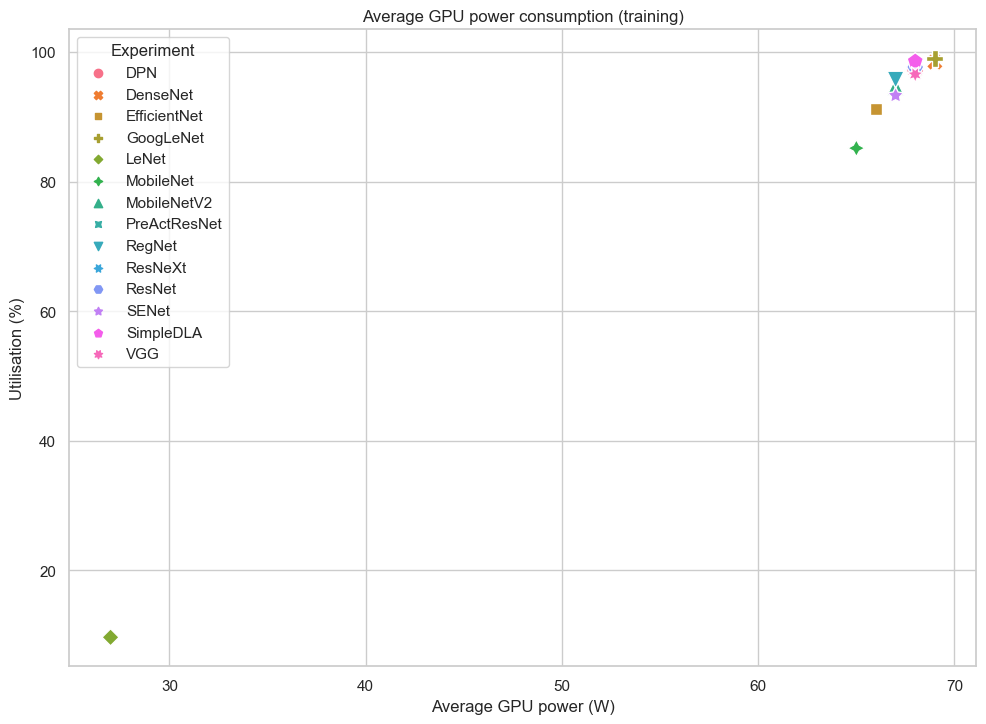

In [158]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['gpu_power_w'] = round(df_stats_train_tmp['gpu_power_w']/1000)

sns.set(style="whitegrid")
sns.scatterplot(x="gpu_power_w", y="gpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Average GPU power consumption (training)')
plt.xlabel("Average GPU power (W)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='upper left', title='Experiment')
plt.show()

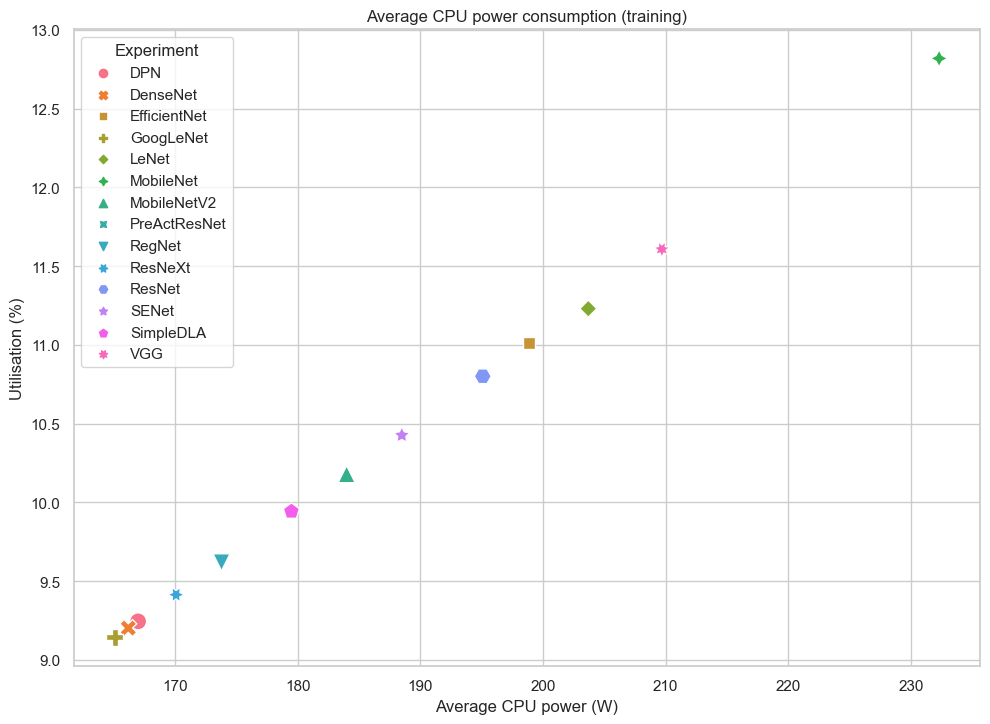

In [159]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['cpu_delta_power_w'] = round(df_stats_train_tmp['cpu_delta_power_w'],1)

sns.set(style="whitegrid")
sns.scatterplot(x="cpu_delta_power_w", y="cpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Average CPU power consumption (training)')
plt.xlabel("Average CPU power (W)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='upper left', title='Experiment')
plt.show()

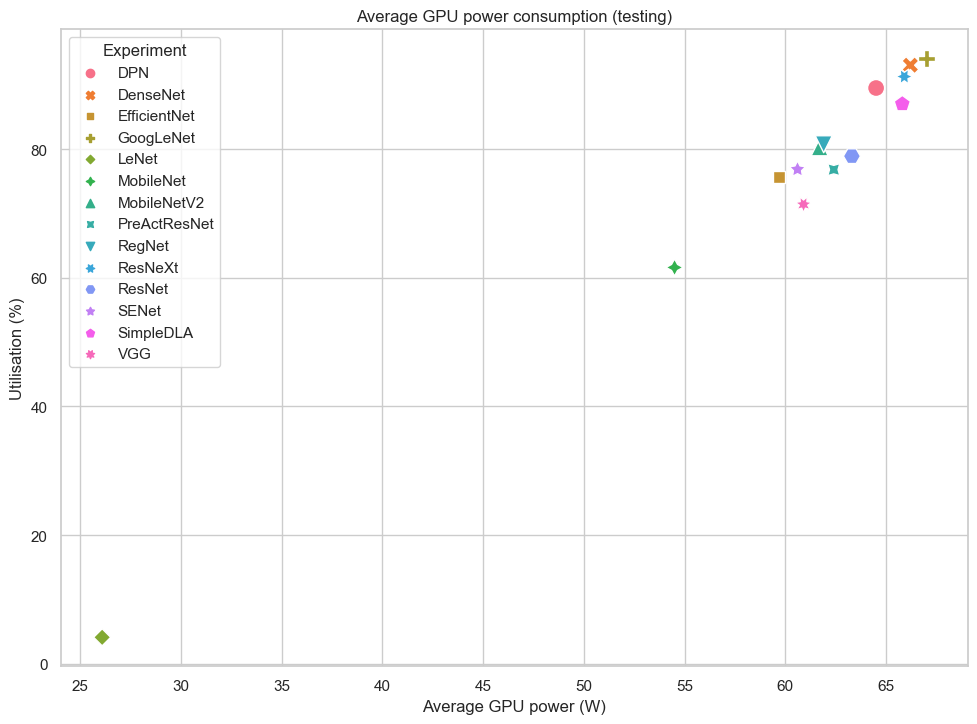

In [160]:
df_stats_test_tmp = df_stats_test.groupby('project_name').mean().reset_index()
df_stats_test_tmp['gpu_power_w'] = round(df_stats_test_tmp['gpu_power_w']/1000, 1)

sns.set(style="whitegrid")
sns.scatterplot(x="gpu_power_w", y="gpu_percent", hue="project_name", data=df_stats_test_tmp, style='project_name', s=150)
plt.title('Average GPU power consumption (testing)')
plt.xlabel("Average GPU power (W)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='upper left', title='Experiment')
plt.show()

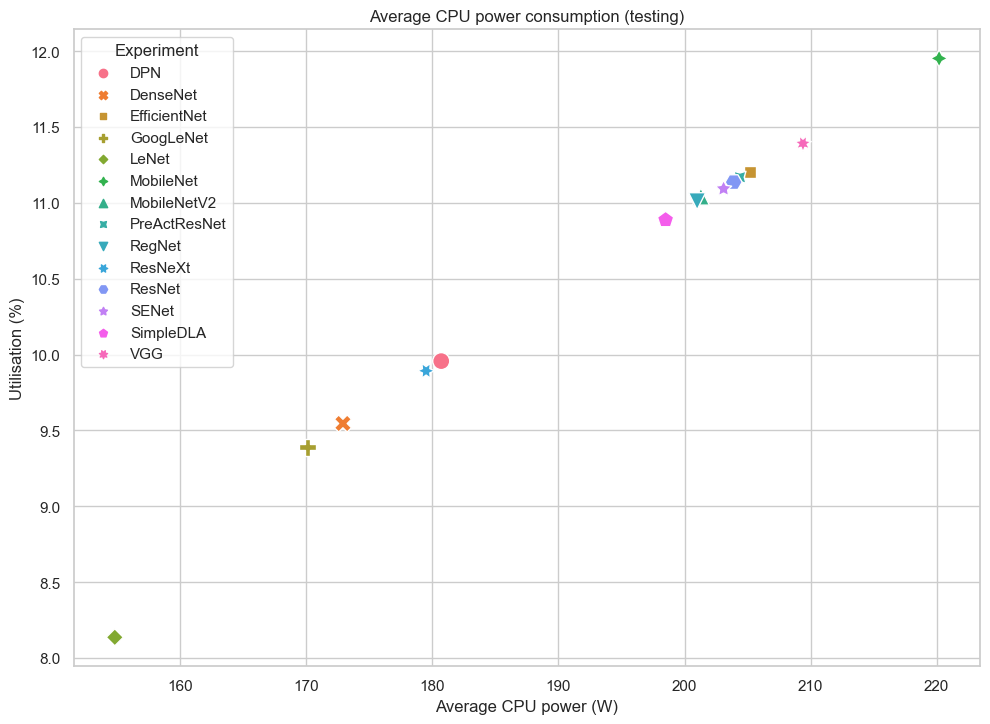

In [161]:
df_stats_test_tmp = df_stats_test.groupby('project_name').mean().reset_index()
df_stats_test_tmp['cpu_delta_power_w'] = round(df_stats_test_tmp['cpu_delta_power_w'],1)

sns.set(style="whitegrid")
sns.scatterplot(x="cpu_delta_power_w", y="cpu_percent", hue="project_name", data=df_stats_test_tmp, style='project_name', s=150)
plt.title('Average CPU power consumption (testing)')
plt.xlabel("Average CPU power (W)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='upper left', title='Experiment')
plt.show()

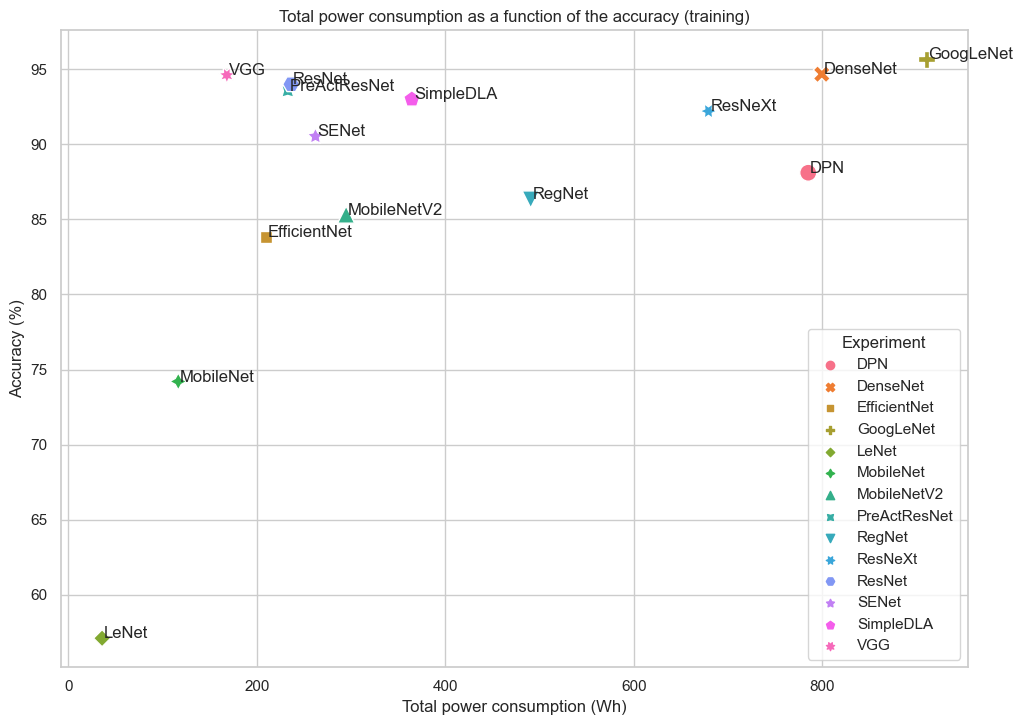

In [162]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['total'] = (df_stats_train_tmp['cpu_delta_power_w'] + (df_stats_train_tmp['gpu_power_w']/1000) + df_stats_train_tmp['ram_power_w']) * (df_stats_train_tmp['duration(s)']/1000*EPOCHS / 3600)

sns.set(style="whitegrid")
sns.scatterplot(x="total", y="accuracy", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Total power consumption as a function of the accuracy (training)')
plt.xlabel("Total power consumption (Wh)")
plt.ylabel("Accuracy (%)")
plt.legend(loc='lower right', title='Experiment')
add_label(df_stats_train_tmp.total, df_stats_train_tmp.accuracy, df_stats_train_tmp.project_name, plt.gca(), 2) 
plt.show()

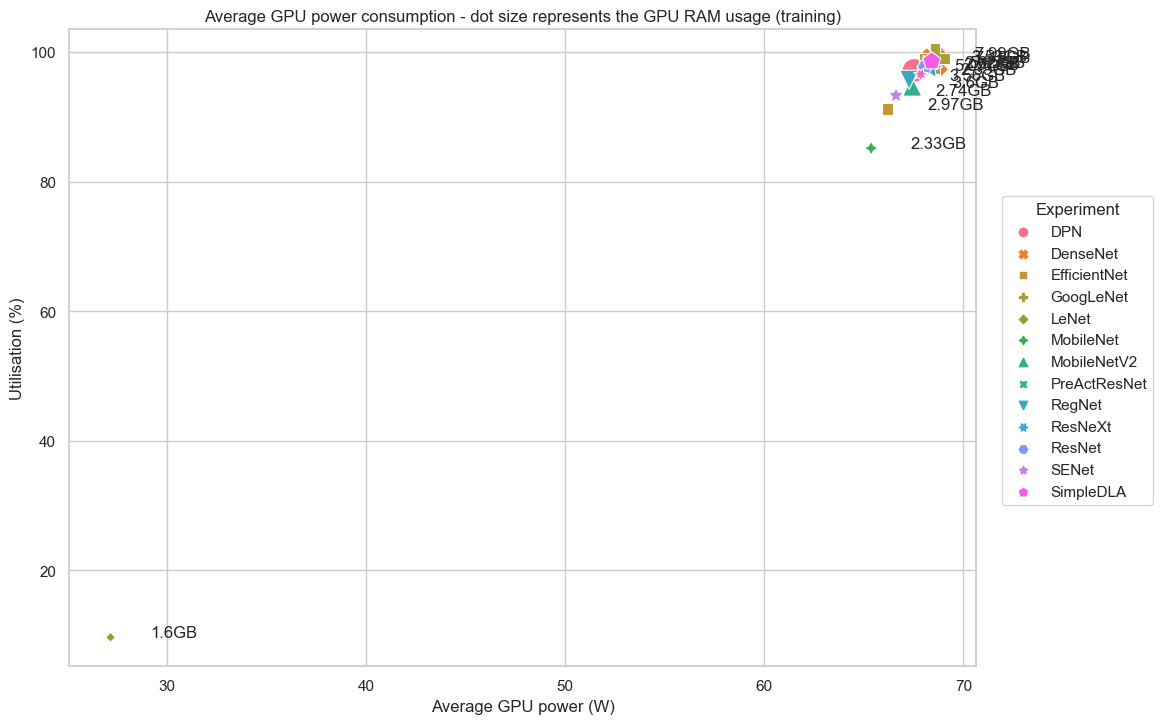

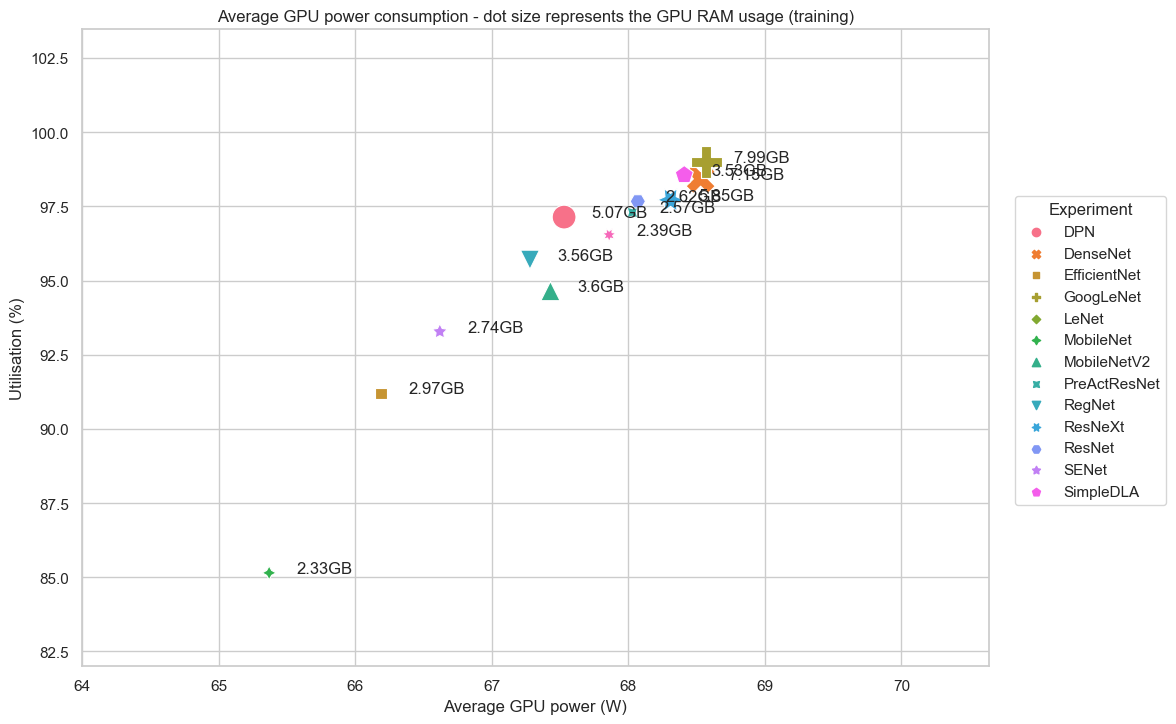

In [163]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['gpu_power_w'] = round(df_stats_train_tmp['gpu_power_w']/1000, 2)
df_stats_train_tmp['gpu_memory_used_b'] = round(df_stats_train_tmp['gpu_memory_used_b']/pow(10, 9), 2)

sns.set(style="whitegrid")
ax = sns.scatterplot(x="gpu_power_w", y="gpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', size='gpu_memory_used_b', sizes=(50, 500))
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:14],l[1:14], loc="upper left", bbox_to_anchor=(1.02, 0.75), title='Experiment')
plt.title('Average GPU power consumption - dot size represents the GPU RAM usage (training)')
plt.xlabel("Average GPU power (W)")
plt.ylabel("Utilisation (%)")

add_label(df_stats_train_tmp.gpu_power_w, df_stats_train_tmp.gpu_percent, df_stats_train_tmp.gpu_memory_used_b, plt.gca(), 2, 'GB') 
plt.show()

sns.set(style="whitegrid")
ax = sns.scatterplot(x="gpu_power_w", y="gpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', size='gpu_memory_used_b', sizes=(50, 500))
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:14],l[1:14], loc="upper left", bbox_to_anchor=(1.02, 0.75), title='Experiment')
plt.title('Average GPU power consumption - dot size represents the GPU RAM usage (training)')
plt.xlabel("Average GPU power (W)")
plt.ylabel("Utilisation (%)")
plt.xlim(64, None)
plt.ylim(82, None)

for index, row in df_stats_train_tmp.iterrows():
    ax.annotate(f"{row['gpu_memory_used_b']}GB", (row['gpu_power_w'] + 0.2, row['gpu_percent']))

# add_label(df_stats_train_tmp.gpu_power_w, df_stats_train_tmp.gpu_percent, df_stats_train_tmp.gpu_memory_used_b, plt.gca(), 2, 'GB') 
plt.show()

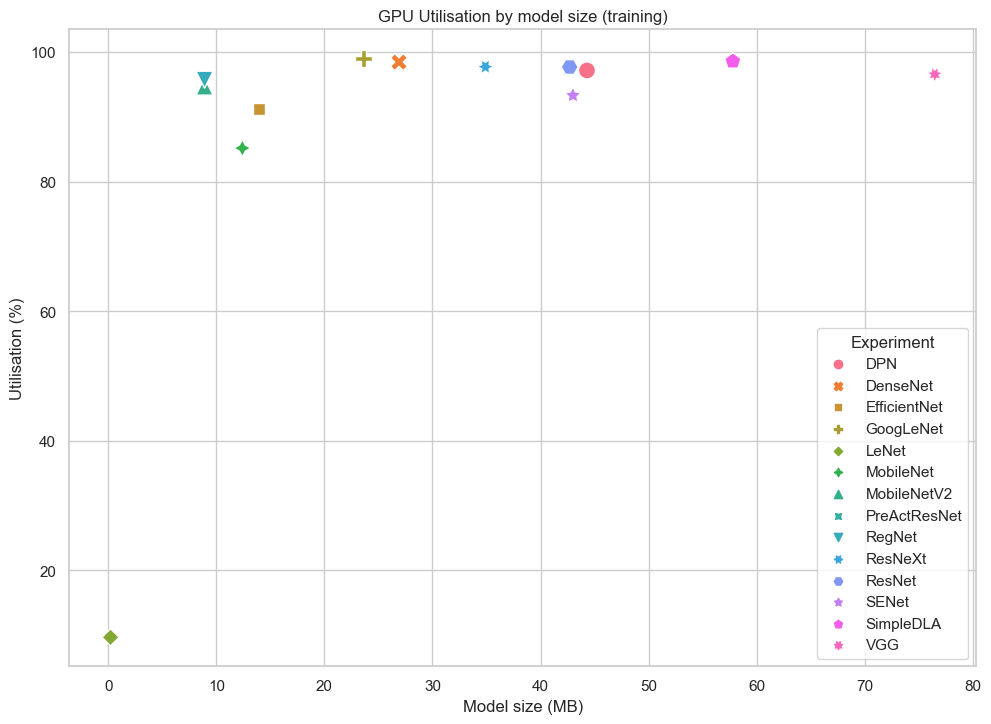

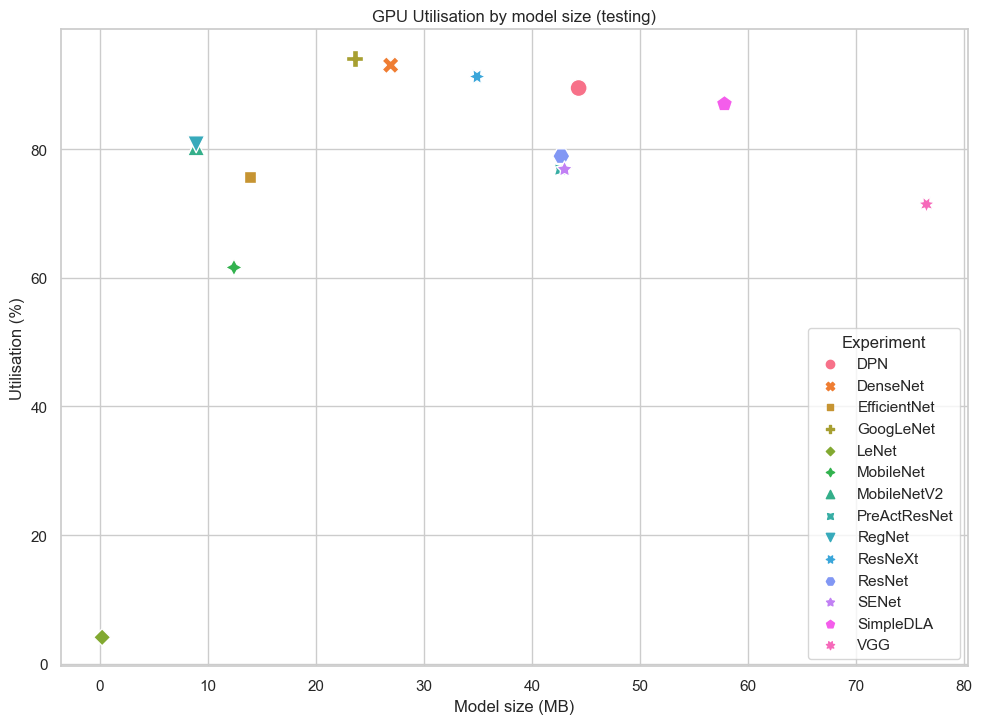

In [164]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['size_mb'] = round(df_stats_train_tmp['size_mb'], 1)

sns.set(style="whitegrid")
ax = sns.scatterplot(x="size_mb", y="gpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('GPU Utilisation by model size (training)')
plt.xlabel("Model size (MB)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='lower right', title='Experiment')

plt.show()

df_stats_test_tmp = df_stats_test.groupby('project_name').mean().reset_index()
df_stats_test_tmp['size_mb'] = round(df_stats_test_tmp['size_mb'], 1)

sns.set(style="whitegrid")
ax = sns.scatterplot(x="size_mb", y="gpu_percent", hue="project_name", data=df_stats_test_tmp, style='project_name', s=150)
plt.title('GPU Utilisation by model size (testing)')
plt.xlabel("Model size (MB)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='lower right', title='Experiment')

plt.show()


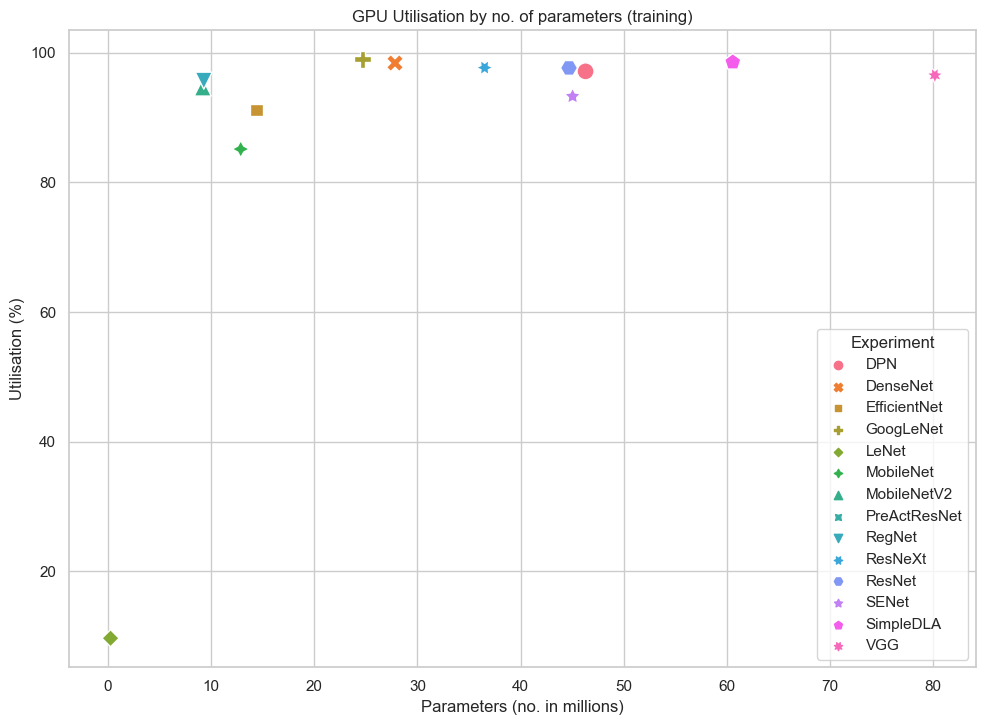

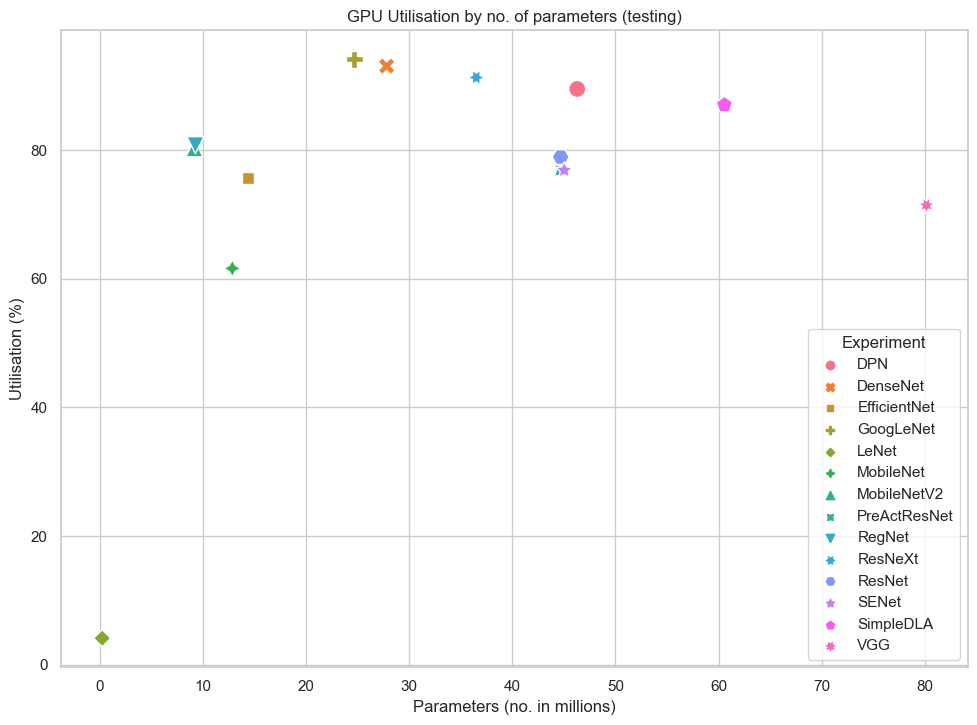

In [165]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['parameters'] = df_stats_train_tmp['parameters']/pow(10, 6)

sns.set(style="whitegrid")
ax = sns.scatterplot(x="parameters", y="gpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('GPU Utilisation by no. of parameters (training)')
plt.xlabel("Parameters (no. in millions)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='lower right', title='Experiment')

plt.show()

df_stats_test_tmp = df_stats_test.groupby('project_name').mean().reset_index()
df_stats_test_tmp['parameters'] = df_stats_test_tmp['parameters']/pow(10, 6)

sns.set(style="whitegrid")
ax = sns.scatterplot(x="parameters", y="gpu_percent", hue="project_name", data=df_stats_test_tmp, style='project_name', s=150)
plt.title('GPU Utilisation by no. of parameters (testing)')
plt.xlabel("Parameters (no. in millions)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='lower right', title='Experiment')

plt.show()

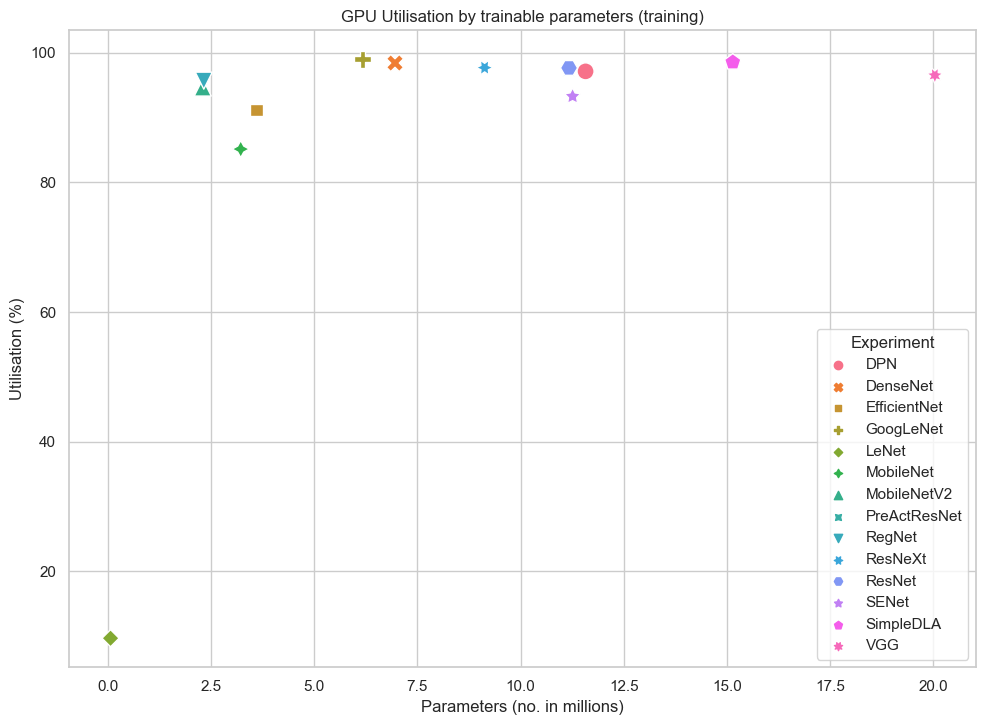

In [166]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['trainable_params'] = df_stats_train_tmp['trainable_params']/pow(10, 6)

sns.set(style="whitegrid")
ax = sns.scatterplot(x="trainable_params", y="gpu_percent", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('GPU Utilisation by trainable parameters (training)')
plt.xlabel("Parameters (no. in millions)")
plt.ylabel("Utilisation (%)")
plt.legend(loc='lower right', title='Experiment')

plt.show()

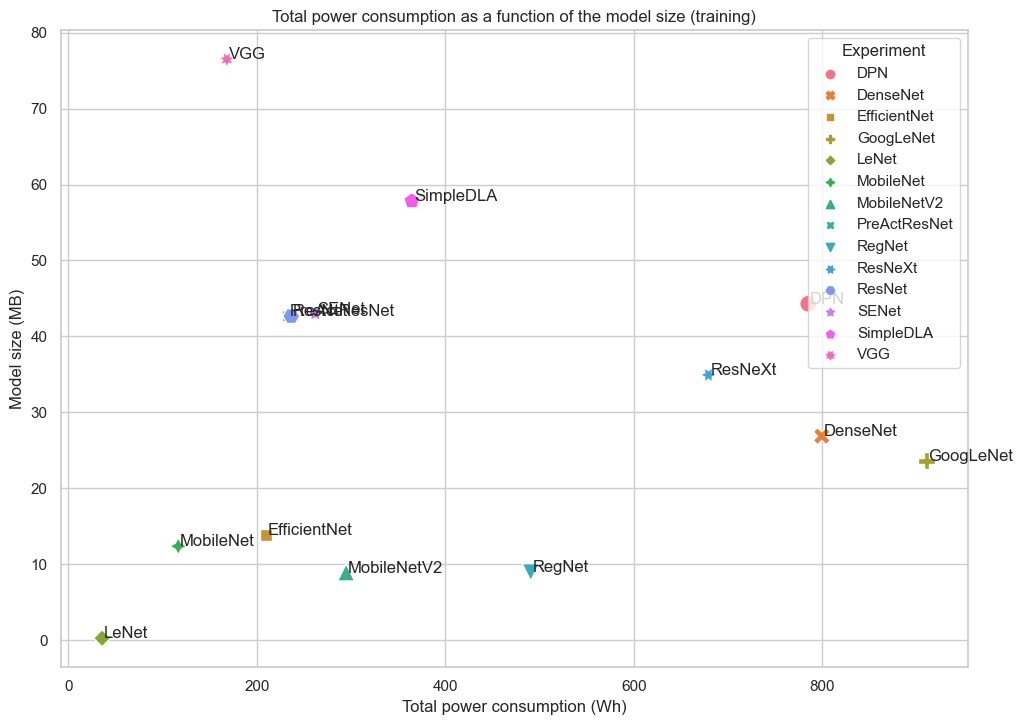

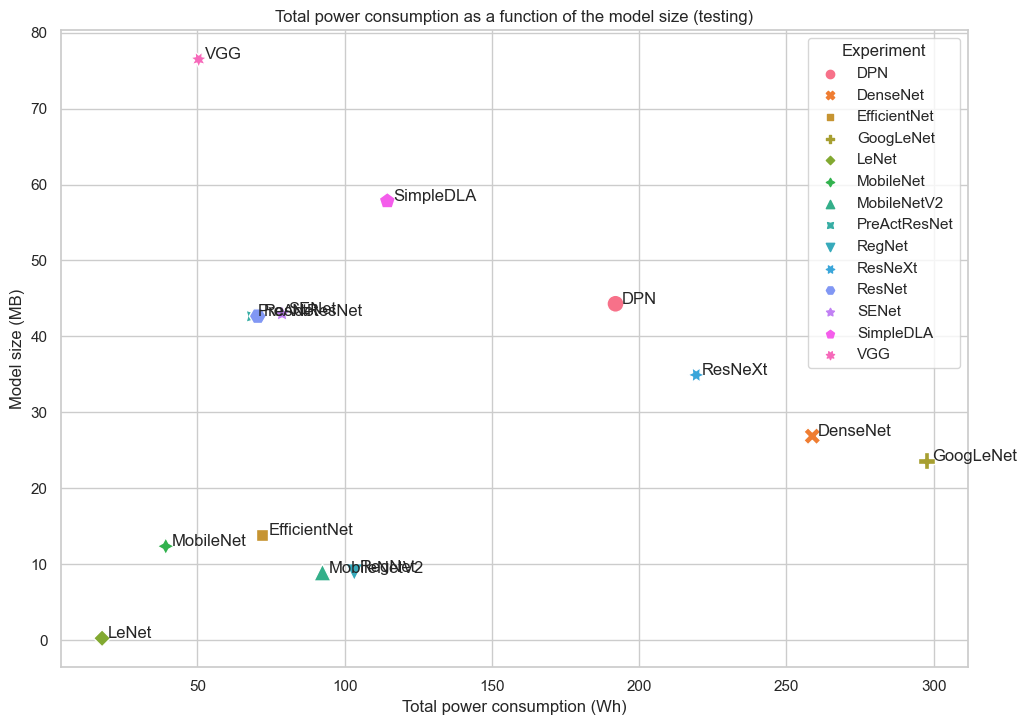

In [169]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['total'] = (df_stats_train_tmp['cpu_delta_power_w'] + (df_stats_train_tmp['gpu_power_w']/1000) + df_stats_train_tmp['ram_power_w']) * (df_stats_train_tmp['duration(s)']/1000*EPOCHS / 3600)

sns.set(style="whitegrid")
sns.scatterplot(x="total", y="size_mb", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Total power consumption as a function of the model size (training)')
plt.xlabel("Total power consumption (Wh)")
plt.ylabel("Model size (MB)")
plt.legend(loc='upper right', title='Experiment')
add_label(df_stats_train_tmp.total, df_stats_train_tmp.size_mb, df_stats_train_tmp.project_name, plt.gca(), 2) 
plt.show()

df_stats_test_tmp = df_stats_test.groupby('project_name').mean().reset_index()
df_stats_test_tmp['total'] = (df_stats_test_tmp['cpu_delta_power_w'] + (df_stats_test_tmp['gpu_power_w']/1000) + df_stats_test_tmp['ram_power_w']) * (df_stats_test_tmp['duration(s)']/1000*EPOCHS / 3600)

sns.set(style="whitegrid")
sns.scatterplot(x="total", y="size_mb", hue="project_name", data=df_stats_test_tmp, style='project_name', s=150)
plt.title('Total power consumption as a function of the model size (testing)')
plt.xlabel("Total power consumption (Wh)")
plt.ylabel("Model size (MB)")
plt.legend(loc='upper right', title='Experiment')
add_label(df_stats_test_tmp.total, df_stats_test_tmp.size_mb, df_stats_test_tmp.project_name, plt.gca(), 2) 
plt.show()

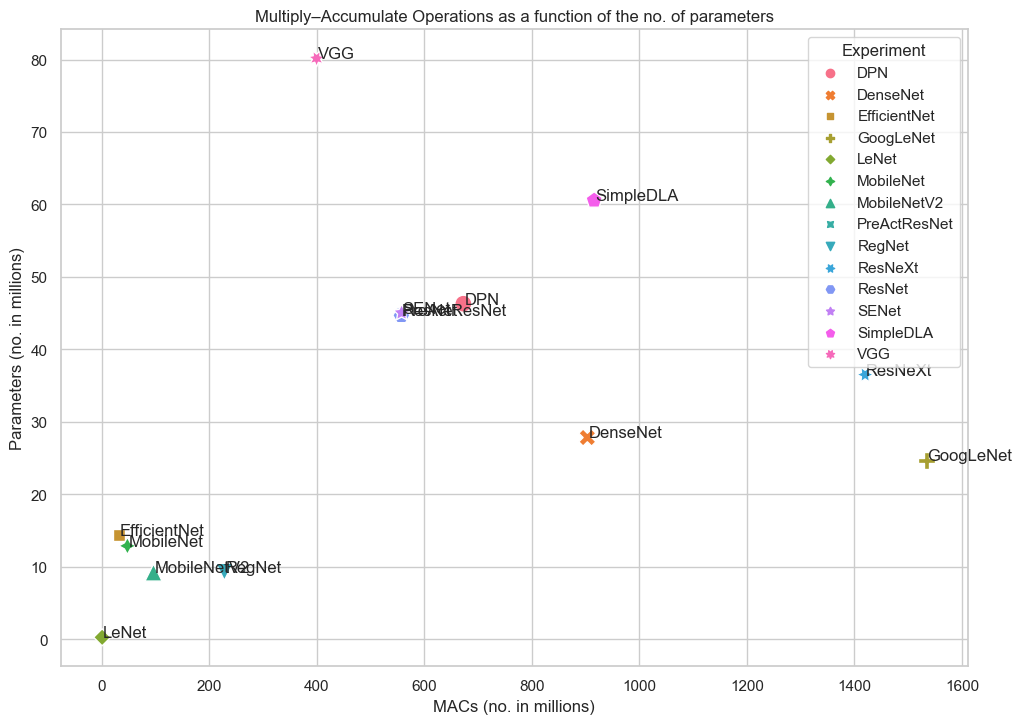

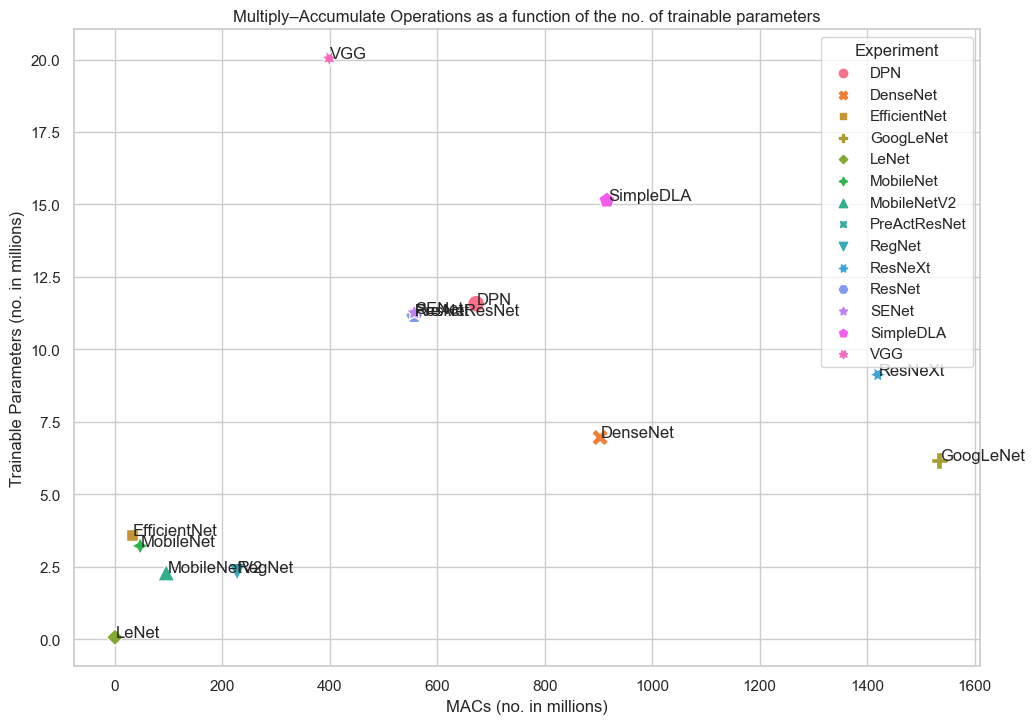

In [173]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['macs'] = df_stats_train_tmp['macs'] / pow(10, 6)
df_stats_train_tmp['parameters'] = df_stats_train_tmp['parameters'] / pow(10, 6)
df_stats_train_tmp['trainable_params'] = df_stats_train_tmp['trainable_params'] / pow(10, 6)

sns.set(style="whitegrid")
sns.scatterplot(x="macs", y="parameters", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Multiply–Accumulate Operations as a function of the no. of parameters')
plt.xlabel("MACs (no. in millions)")
plt.ylabel("Parameters (no. in millions)")
plt.legend(loc='upper right', title='Experiment')
add_label(df_stats_train_tmp.macs, df_stats_train_tmp.parameters, df_stats_train_tmp.project_name, plt.gca(), 2) 
plt.show()

sns.set(style="whitegrid")
sns.scatterplot(x="macs", y="trainable_params", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Multiply–Accumulate Operations as a function of the no. of trainable parameters')
plt.xlabel("MACs (no. in millions)")
plt.ylabel("Trainable Parameters (no. in millions)")
plt.legend(loc='upper right', title='Experiment')
add_label(df_stats_train_tmp.macs, df_stats_train_tmp.trainable_params, df_stats_train_tmp.project_name, plt.gca(), 2) 
plt.show()


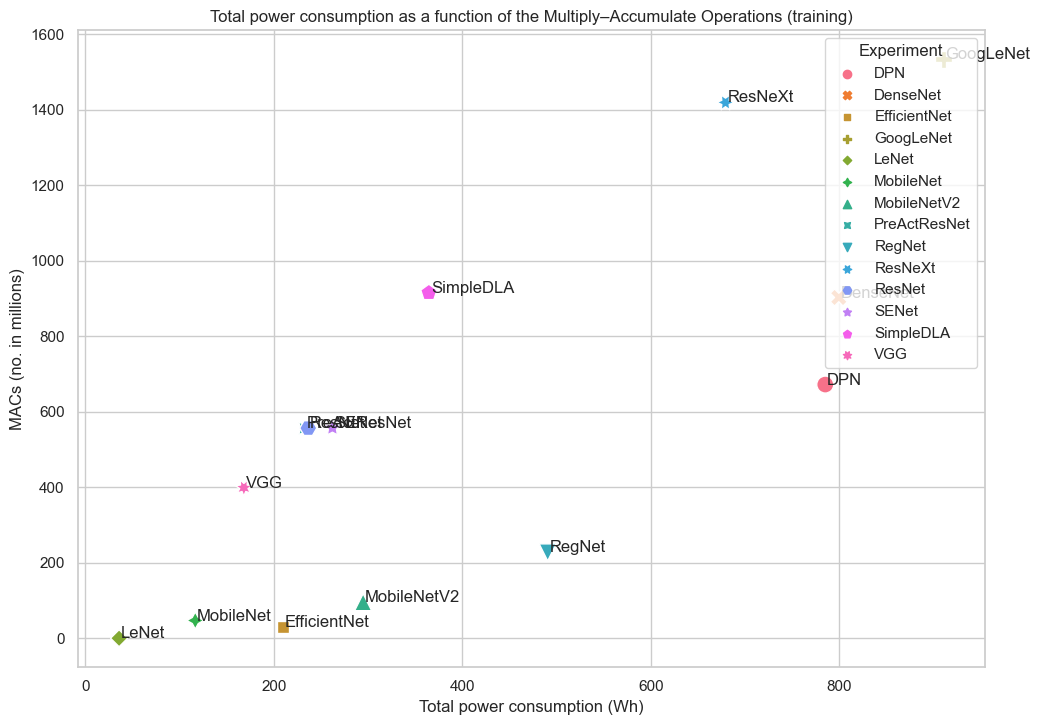

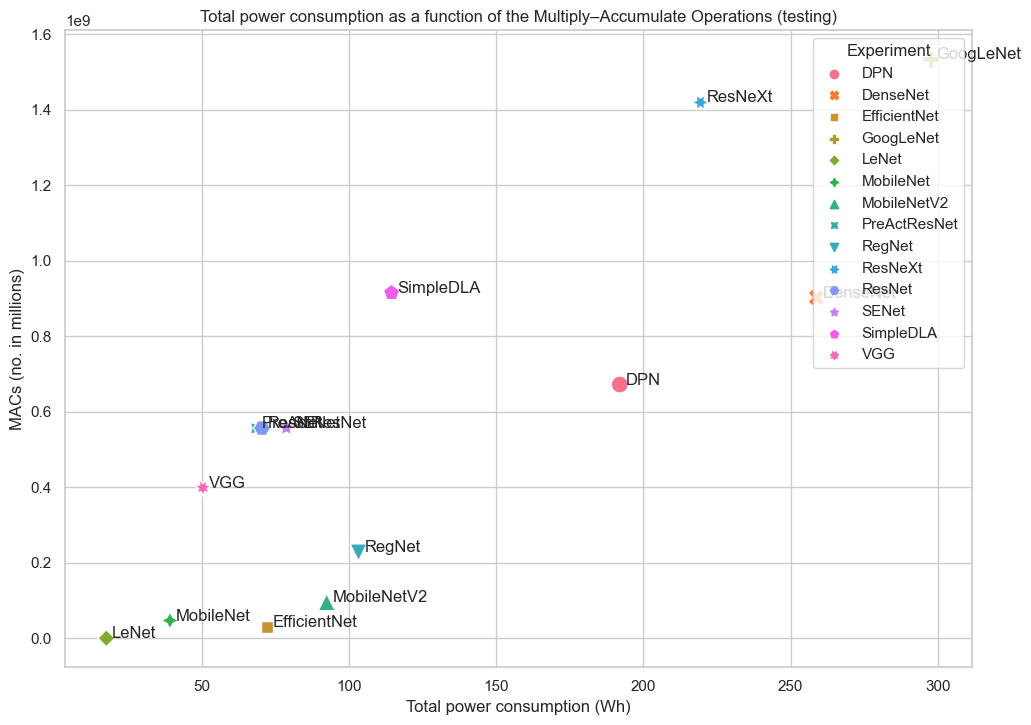

In [174]:
df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['total'] = (df_stats_train_tmp['cpu_delta_power_w'] + (df_stats_train_tmp['gpu_power_w']/1000) + df_stats_train_tmp['ram_power_w']) * (df_stats_train_tmp['duration(s)']/1000*EPOCHS / 3600)
df_stats_train_tmp['macs'] = df_stats_train_tmp['macs'] / pow(10, 6)
df_stats_train_tmp['parameters'] = df_stats_train_tmp['parameters'] / pow(10, 6)
df_stats_train_tmp['trainable_params'] = df_stats_train_tmp['trainable_params'] / pow(10, 6)


sns.set(style="whitegrid")
sns.scatterplot(x="total", y="macs", hue="project_name", data=df_stats_train_tmp, style='project_name', s=150)
plt.title('Total power consumption as a function of the Multiply–Accumulate Operations (training)')
plt.xlabel("Total power consumption (Wh)")
plt.ylabel("MACs (no. in millions)")
plt.legend(loc='upper right', title='Experiment')
add_label(df_stats_train_tmp.total, df_stats_train_tmp.macs, df_stats_train_tmp.project_name, plt.gca(), 2) 
plt.show()

df_stats_test_tmp = df_stats_test.groupby('project_name').mean().reset_index()
df_stats_test_tmp['total'] = (df_stats_test_tmp['cpu_delta_power_w'] + (df_stats_test_tmp['gpu_power_w']/1000) + df_stats_test_tmp['ram_power_w']) * (df_stats_test_tmp['duration(s)']/1000*EPOCHS / 3600)

sns.set(style="whitegrid")
sns.scatterplot(x="total", y="macs", hue="project_name", data=df_stats_test_tmp, style='project_name', s=150)
plt.title('Total power consumption as a function of the Multiply–Accumulate Operations (testing)')
plt.xlabel("Total power consumption (Wh)")
plt.ylabel("MACs (no. in millions)")
plt.legend(loc='upper right', title='Experiment')
add_label(df_stats_test_tmp.total, df_stats_test_tmp.macs, df_stats_test_tmp.project_name, plt.gca(), 2) 
plt.show()

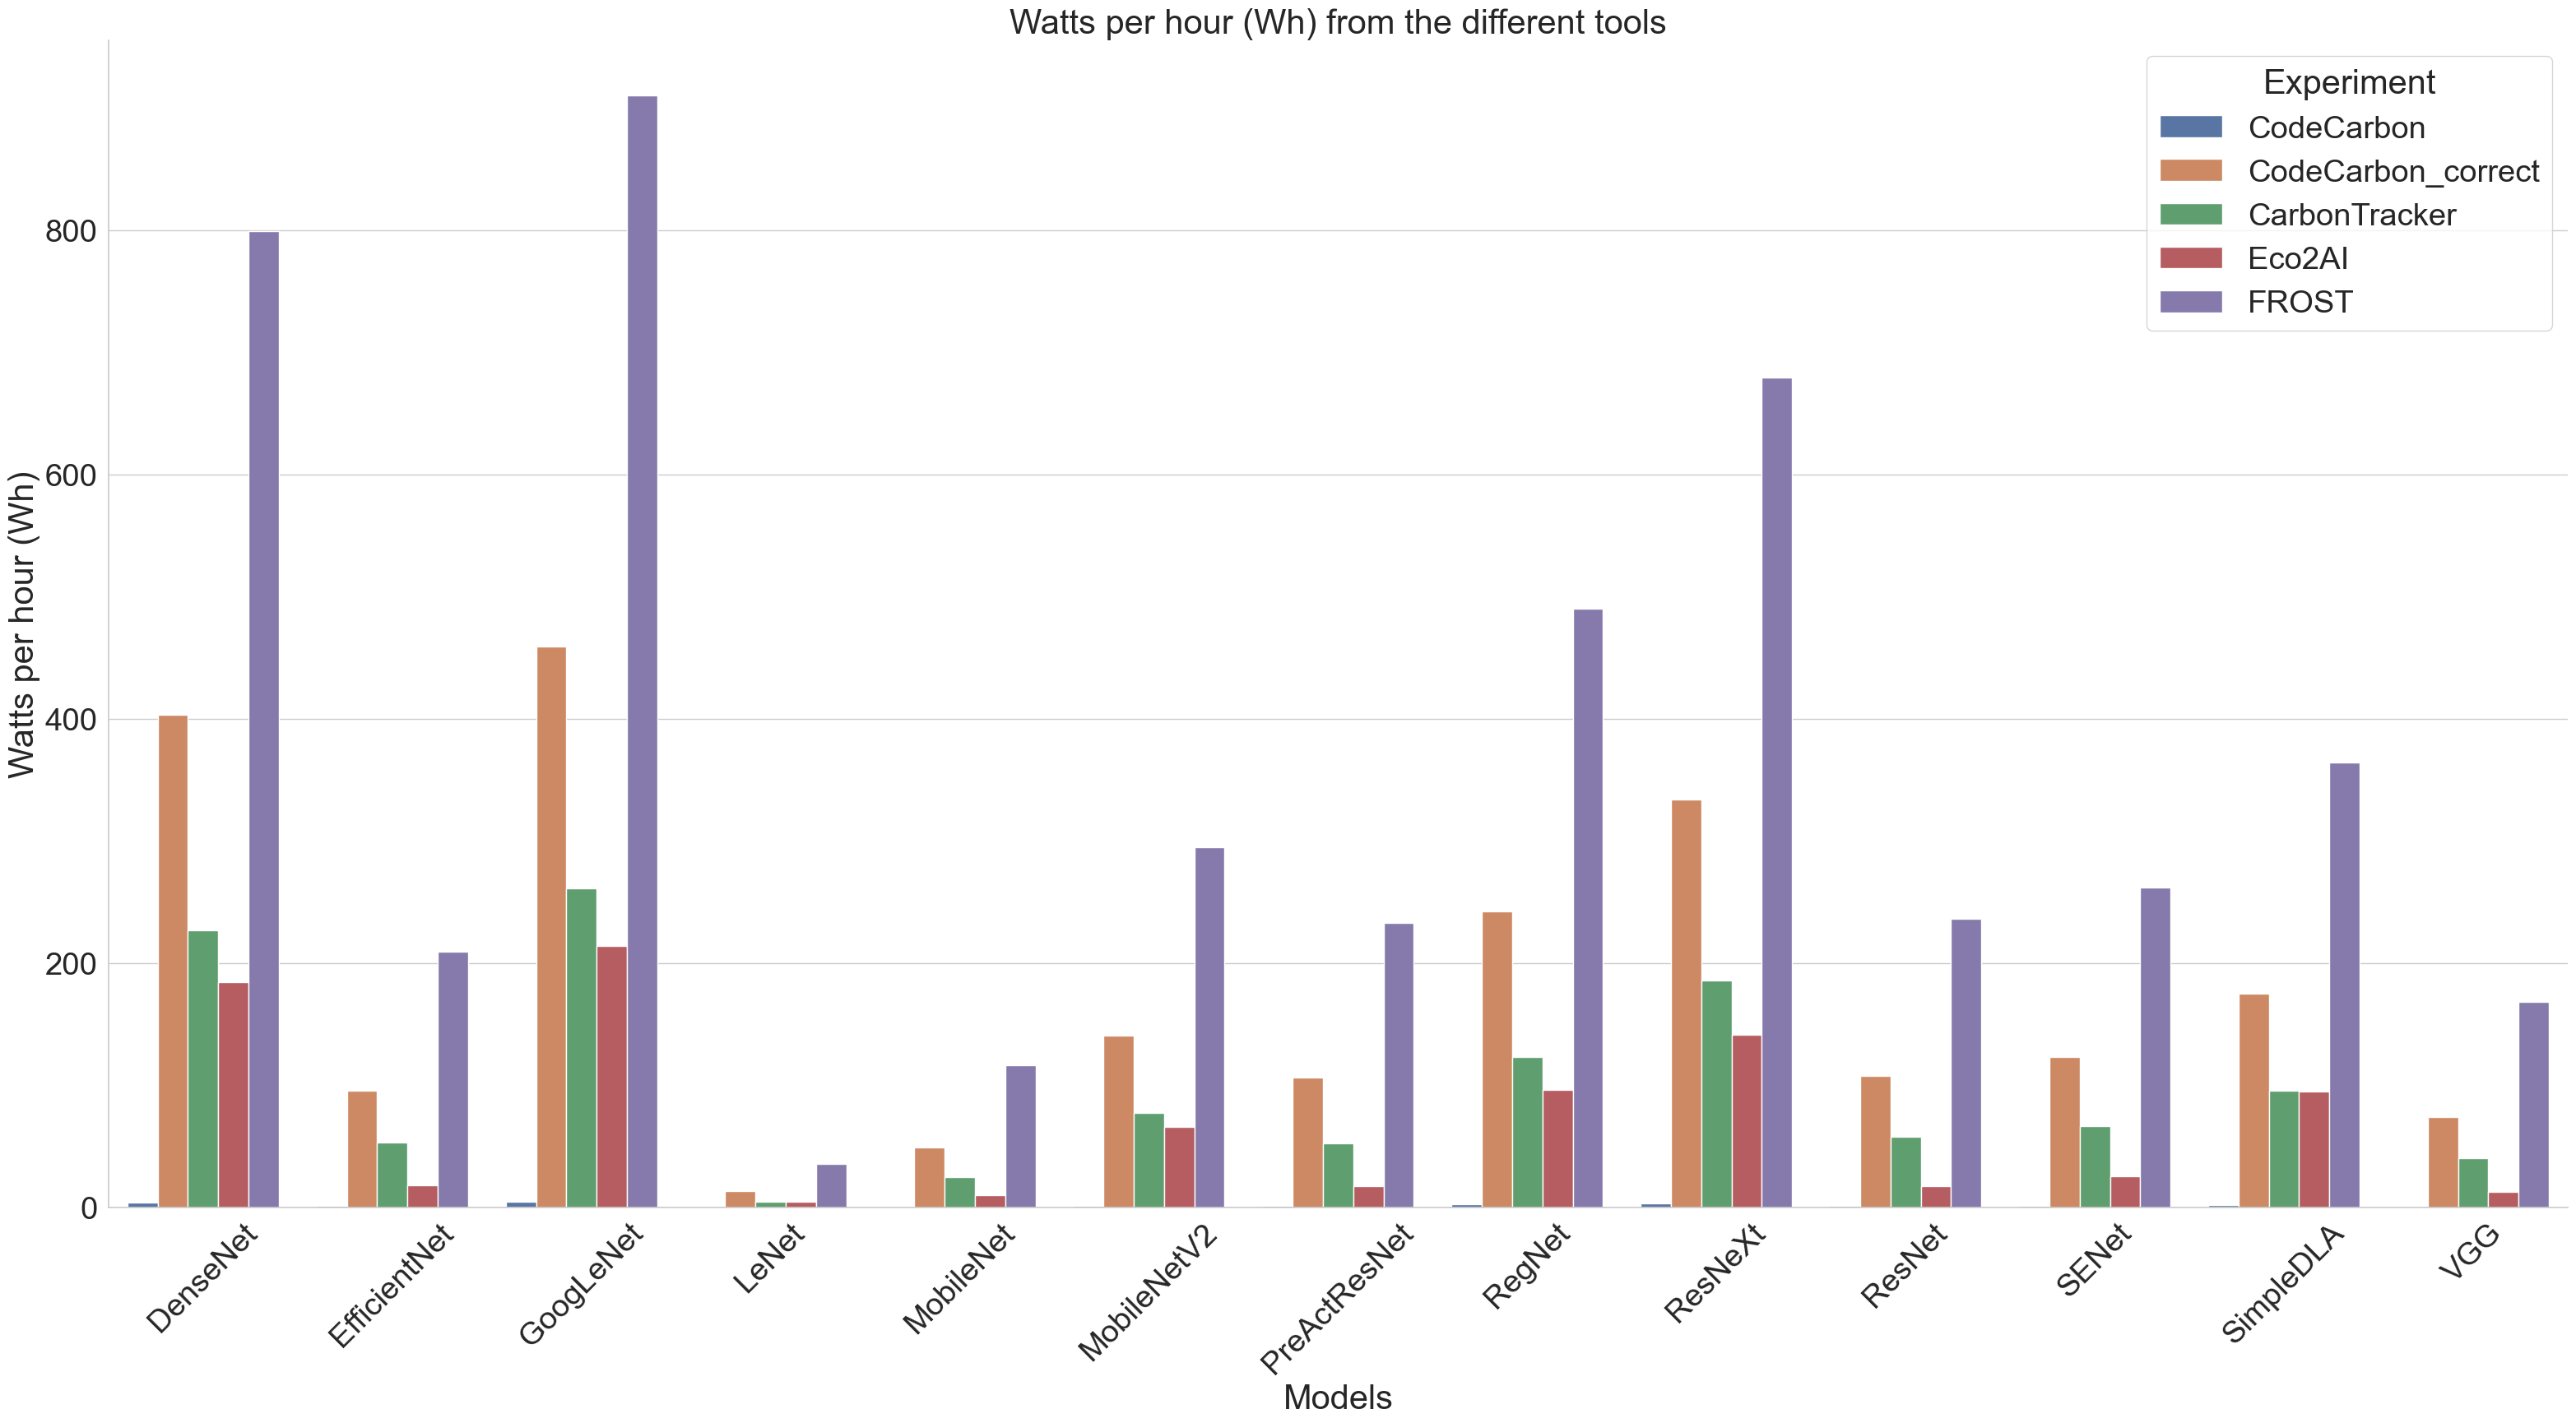

In [168]:
def extract_energy_consumption_carbontracker():
    files = os.listdir(SERVER1_PATH)
    data = []
    
    for file in files:
        if file.endswith('carbontracker_output.log'):
            file_path = os.path.join(SERVER1_PATH, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for i in range(len(lines)):
                    if 'Actual consumption for' in lines[i]:
                        if i + 4 < len(lines):
                            energy_line = lines[i+2].strip()
                            energy_value = float(energy_line.split('\t')[1].split(' ')[0])
                            data.append((file.split('_')[0], energy_value))
                        break
    
    df = pd.DataFrame(data, columns=['project_name', 'CarbonTracker'])
    return df


df_stats_train_tmp = df_stats_train.groupby('project_name').mean().reset_index()
df_stats_train_tmp['FROST'] = (df_stats_train_tmp['cpu_delta_power_w'] + (df_stats_train_tmp['gpu_power_w']/1000) + df_stats_train_tmp['ram_power_w']) * (df_stats_train_tmp['duration(s)']/1000*EPOCHS / 3600)
df_stats_train_tmp = df_stats_train_tmp[[ 'project_name', 'FROST']]

df_stats_eco2ai_tmp = df_eco2ai_results_train.groupby('experiment_description').sum().reset_index()
df_stats_eco2ai_tmp['Eco2AI'] = df_stats_eco2ai_tmp['power_consumption(kWh)'] * 1000
df_stats_eco2ai_tmp = df_stats_eco2ai_tmp[['experiment_description', 'Eco2AI']]
df_stats_eco2ai_tmp.rename(columns={'experiment_description': 'project_name'}, inplace=True)

df_codecarbon_tmp = df_codecarbon_results_train.groupby('project_name')[['cpu_power', 'gpu_power', 'ram_power']].mean().reset_index()
df_codecarbon_tmp2 = df_codecarbon_results_train.groupby('project_name')['duration'].first().reset_index()
df_codecarbon_tmp = df_codecarbon_tmp.merge(df_codecarbon_tmp2, on='project_name', how='left')

df_carbontracker_tmp = extract_energy_consumption_carbontracker()
df_carbontracker_tmp['CarbonTracker'] = df_carbontracker_tmp['CarbonTracker'] * 1000

merged_duration_df = pd.DataFrame()
merged_duration_df['CodeCarbon'] = df_codecarbon_results_train.groupby('project_name')['energy_consumed'].max()*1000
merged_duration_df.reset_index(inplace=True)
merged_duration_df['CodeCarbon_correct'] = (df_codecarbon_tmp['cpu_power'] + df_codecarbon_tmp['gpu_power'] + df_codecarbon_tmp['ram_power']) * df_codecarbon_tmp['duration']*EPOCHS / 3600
merged_duration_df = pd.merge(merged_duration_df, df_carbontracker_tmp, on=['project_name'])
merged_duration_df = pd.merge(merged_duration_df, df_stats_eco2ai_tmp, on=['project_name'])
merged_duration_df = pd.merge(merged_duration_df, df_stats_train_tmp, on=['project_name'])


sns.set_theme(style="whitegrid", font_scale=2.5)

sns.catplot(x="project_name", y="value", hue="variable", kind="bar", errorbar=lambda x: (x.min(), x.max()), data=pd.melt(merged_duration_df, id_vars=['project_name']), height=16, aspect=2/1, legend_out=False)
plt.xticks(rotation=45)
plt.title('Watts per hour (Wh) from the different tools')
plt.xlabel("Models")
plt.ylabel("Watts per hour (Wh)")
plt.legend(loc='upper right', title='Experiment')
plt.show()